In [2]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import fitsio
from pathlib import Path

In [3]:
plt.style.use('tableau-colorblind10')

In [4]:
import jupyter_black

jupyter_black.load()

# Catalog comparison

In [55]:
class Catalog:
    def __init__(self, catalog):
        self.hdul = fitsio.FITS(catalog)

    @property
    def RA(self):
        try:
            return self._RA
        except AttributeError:
            self._RA = self.hdul[1]["TARGET_RA"].read()
            return self._RA

    @property
    def DEC(self):
        try:
            return self._DEC
        except AttributeError:
            self._DEC = self.hdul[1]["TARGET_DEC"].read()
            return self._DEC

    @property
    def Z(self):
        try:
            return self._Z
        except AttributeError:
            self._Z = self.hdul[1]["Z"].read()
            return self._Z

In [56]:
catdir = Path("/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-tests/catalogs/")
north = Catalog(
    catdir / "QSO_cat_iron_main_dark_healpix_v0-altbal_zwarn_cut_north.fits"
)
south = Catalog(
    catdir / "QSO_cat_iron_main_dark_healpix_v0-altbal_zwarn_cut_south.fits"
)

In [59]:
analyses = [north, south]
north.label = "north"
south.label = "south"

north.colour = "C0"
south.colour = "C1"

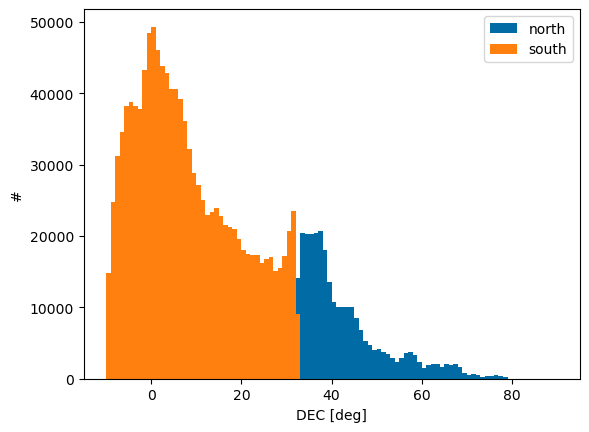

In [60]:
fig, ax = plt.subplots()

bins = np.linspace(-10, 90, 101)

for analysis in analyses:
    ax.hist(analysis.DEC, label=analysis.label, bins=bins, color=analysis.colour)
ax.set_xlabel("DEC [deg]")
ax.set_ylabel("#")
ax.legend()

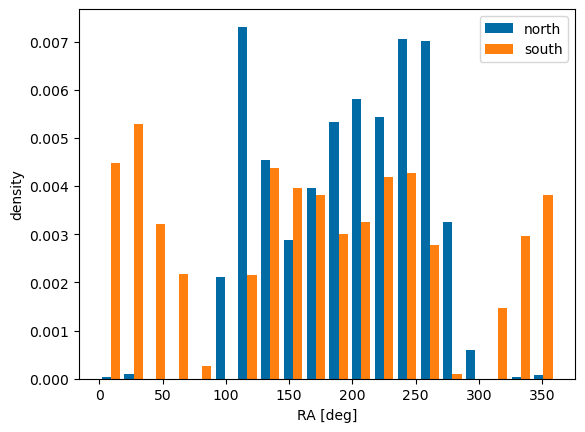

In [61]:
fig, ax = plt.subplots()

ax.hist(
    [analysis.RA for analysis in analyses],
    label=[analysis.label for analysis in analyses],
    color=[analysis.colour for analysis in analyses],
    bins=20,
    density=True,
)
ax.set_xlabel("RA [deg]")
ax.set_ylabel("density")
ax.legend()

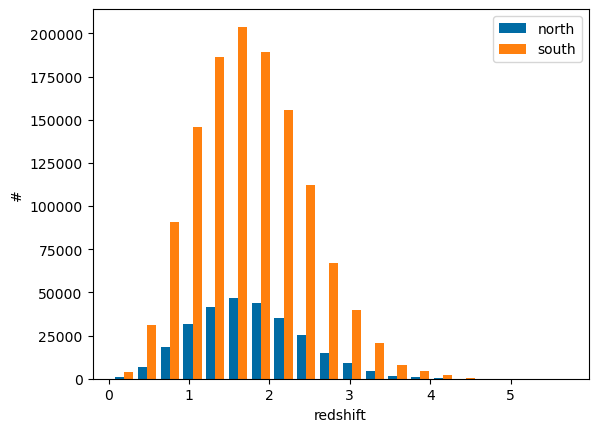

In [62]:
fig, ax = plt.subplots()

bins = np.linspace(0, 5, 20)
ax.hist(
    [analysis.Z for analysis in analyses],
    label=[analysis.label for analysis in analyses],
    color=[analysis.colour for analysis in analyses],
    bins=20,
    density=False,
)
ax.set_xlabel("redshift")
ax.set_ylabel("#")
ax.legend()

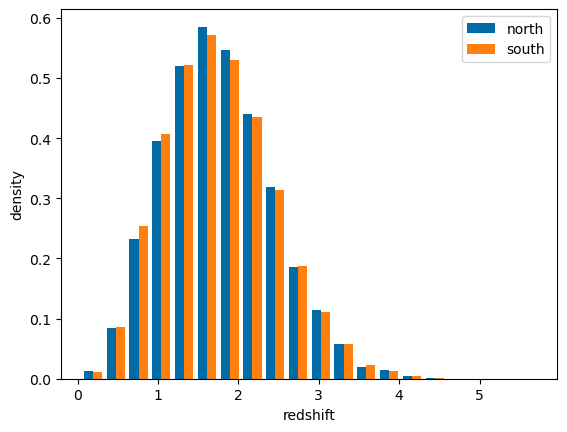

In [63]:
fig, ax = plt.subplots()

bins = np.linspace(0, 5, 20)
ax.hist(
    [analysis.Z for analysis in analyses],
    label=[analysis.label for analysis in analyses],
    color=[analysis.colour for analysis in analyses],
    bins=20,
    density=True,
)
ax.set_xlabel("redshift")
ax.set_ylabel("density")
ax.legend()

Pixels in north 948
Pixels in south 2850


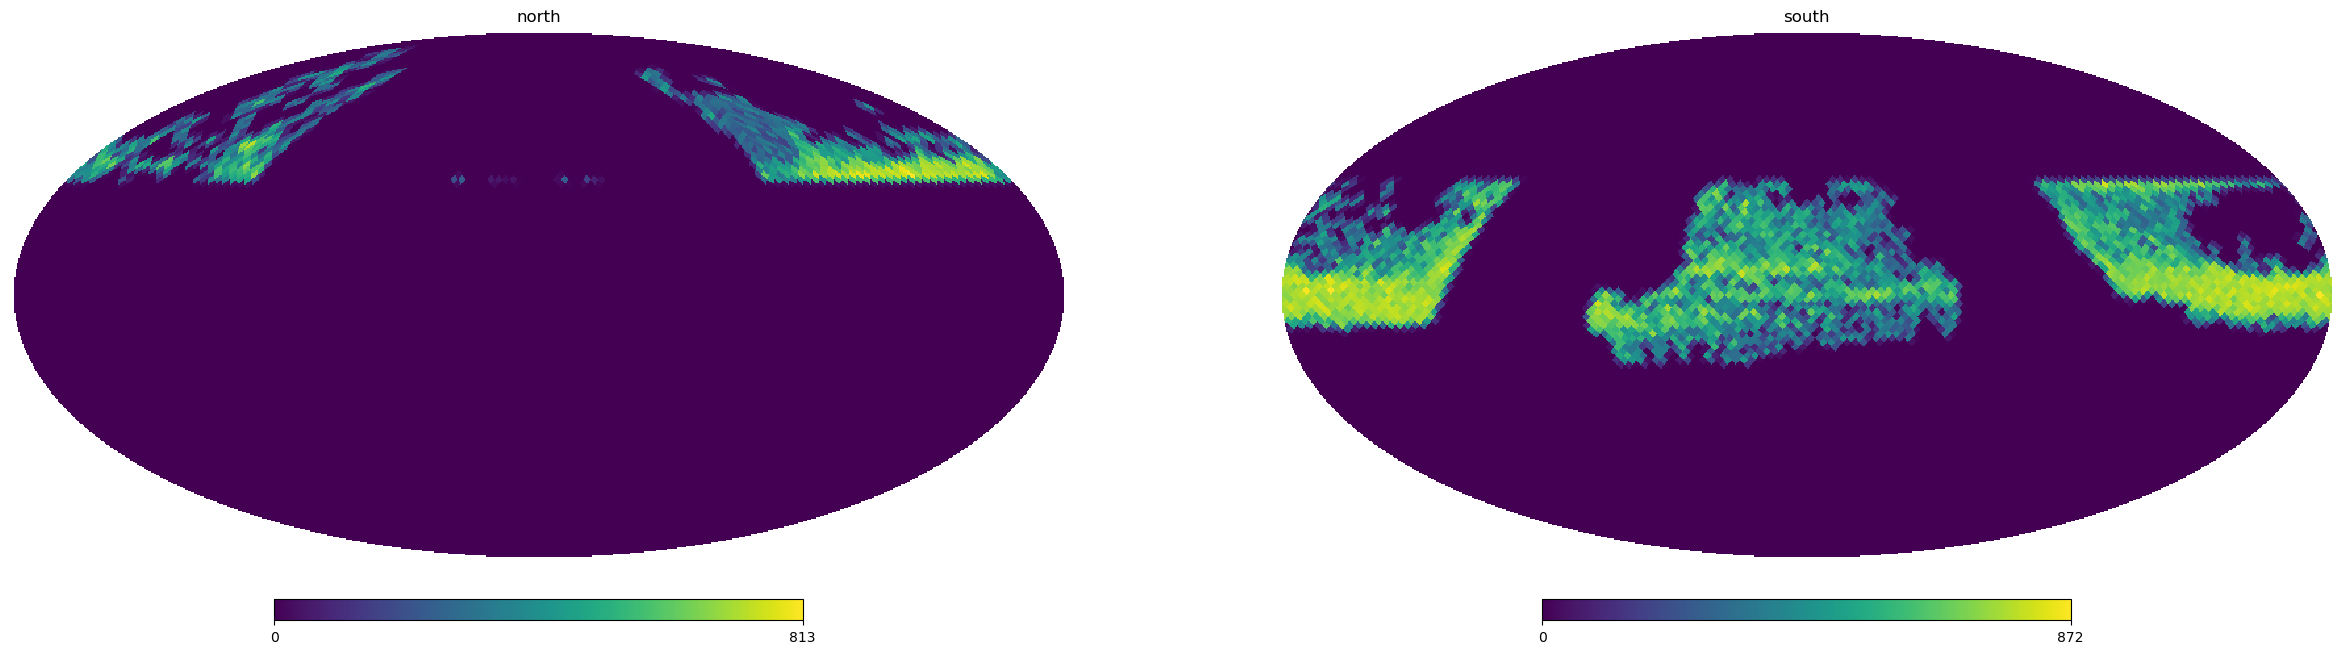

In [64]:
fig, axs = plt.subplots(1, len(analyses), figsize=(30, 10))

for ax, analysis in zip(axs, analyses):
    plt.axes(ax)
    pixels = hp.ang2pix(32, analysis.RA, analysis.DEC, lonlat=True)
    npix = hp.nside2npix(32)
    pixelcount = np.bincount(pixels, minlength=npix)
    hp.mollview(pixelcount, hold=True, title=analysis.label)
    print("Pixels in", analysis.label, (pixelcount > 0).sum())

In [65]:
for analysis in analyses:
    del analysis

# Delta extraction

In [ ]:
## This cell can convert paths into something that looks like a bookkeeper and can be run using this notebook
# from picca_bookkeeper.fake_bookkeeper import FakeBookkeeper

# attributes_files = dict(
#     civ="/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-tests/deltas/delta-civ-5-2/Log/delta_attributes.fits.gz",
#     ciii="/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-tests/deltas/delta-ciii-5-1/Log/delta_attributes.fits.gz",
#     lya="/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-tests/deltas/delta-lya-5-2/Log/delta_attributes.fits.gz",
#     lyb="/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-tests/deltas/delta-lyb-5-2/Log/delta_attributes.fits.gz",
# )

# export_files = {
#     "lyalya_lyalya": "/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-tests/correlations/correlation-lyalya-5-2-1/cf_lya_x_lya_exp.fits",
#     "lyalya_lyalyb": "/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-tests/correlations/correlation-lyalyb-5-2-1/cf_lya_x_lyb_exp.fits",
#     "lyalya": "/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-tests/correlations/correlation-qsolya-5-2-1/cf_qso_x_lya_exp.fits",
#     "lyalyb": "/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-tests/correlations/correlation-qsolyb-5-2-1/cf_qso_x_lyb_exp.fits",
# }

# fit_file = "/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-tests/vegafits/vega-5-2-1-0/lyaxlya_lyaxlyb_lyaxqso_lybxqso/output_fitter/lyaxlya_lyaxlyb_lyaxqso_lybxqso-baseline.fits"

# julien = FakeBookkeeper(attributes_files, export_files, fit_file)
# julien.colour = "C1"
# julien.label = "Julien"

In [6]:
from picca_bookkeeper.bookkeeper import Bookkeeper
from picca_bookkeeper.read_deltas import ReadDeltas, Plots as DeltasPlots

In [7]:
basedir = Path(
    "/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-IFAE-tests/configs/v1"
)
north = Bookkeeper(basedir / "north.yaml")

south = Bookkeeper(basedir / "south.yaml")

In [8]:
north.label = "north"
south.label = "south"
analyses = north, south

north.colour = "C0"
south.colour = "C1"

reference = north

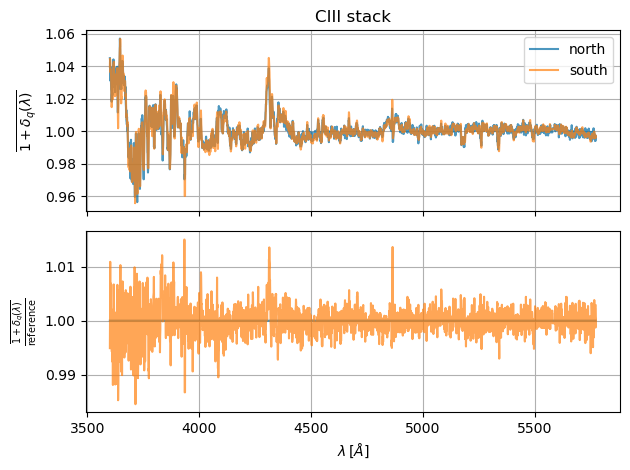

In [9]:
region = "CIII"
calib_step = 1

fig, axs = plt.subplots(2, 1, sharex=True)

ax = axs[0]
for bkp in analyses:
    bkp.data = DeltasPlots.stack(
        bkp,
        region=region,
        calib_step=calib_step,
        ax=ax,
        plot_kwargs=dict(
            label=bkp.label,
            alpha=0.7,
            color=bkp.colour,
        ),
        # rebin=5,
    )
ax.legend()
ax.grid(visible=True)

ax = axs[1]
for bkp in analyses:
    ax.plot(
        bkp.data[0],
        bkp.data[1] / reference.data[1],
        alpha=0.7,
        color=bkp.colour,
    )
ax.grid(visible=True)
ax.set_xlabel(axs[0].get_xlabel())

ylabel = axs[0].get_ylabel().replace("$", "")
ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

axs[0].set_xlabel(None)

axs[0].set_title(f"{region} stack")
plt.tight_layout()

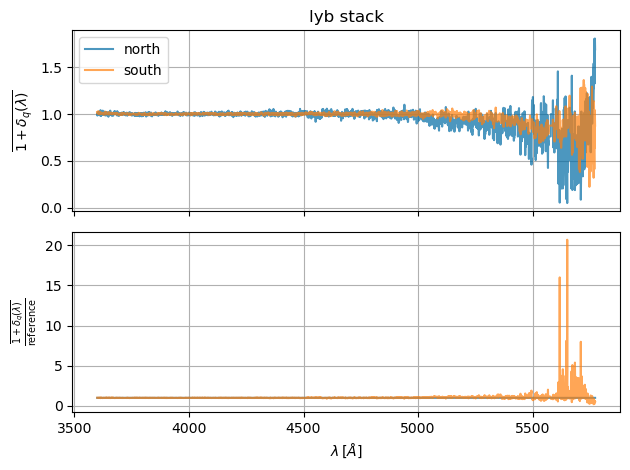

In [74]:
region = "lyb"
calib_step = None

fig, axs = plt.subplots(2, 1, sharex=True)

offset = 0.0

ax = axs[0]
for bkp in analyses:
    bkp.data = DeltasPlots.stack(
        bkp,
        region=region,
        calib_step=calib_step,
        ax=ax,
        plot_kwargs=dict(
            label=bkp.label,
            alpha=0.7,
            color=bkp.colour,
        ),
        # rebin=5,
        offset=offset,
    )
    offset += 0
ax.legend()
ax.grid(visible=True)

ax = axs[1]
for bkp in analyses:
    ax.plot(
        bkp.data[0],
        bkp.data[1] / reference.data[1],
        alpha=0.7,
        color=bkp.colour,
    )
ax.grid(visible=True)
ax.set_xlabel(axs[0].get_xlabel())

ylabel = axs[0].get_ylabel().replace("$", "")
ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

axs[0].set_xlabel(None)

axs[0].set_title(f"{region} stack")
plt.tight_layout()

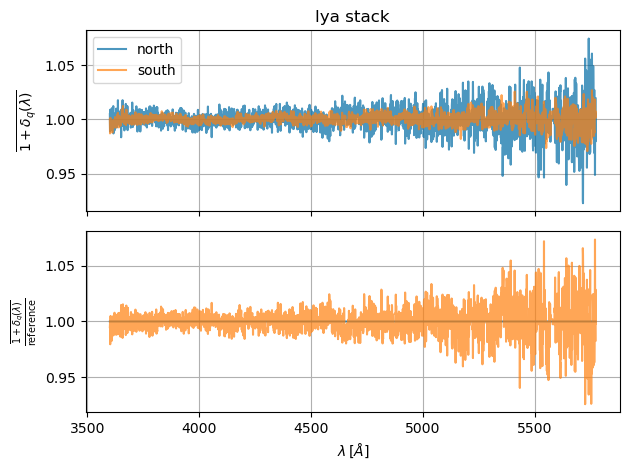

In [75]:
region = "lya"
calib_step = None

fig, axs = plt.subplots(2, 1, sharex=True)

offset = 0.0

ax = axs[0]
for bkp in analyses:
    bkp.data = DeltasPlots.stack(
        bkp,
        region=region,
        calib_step=calib_step,
        ax=ax,
        plot_kwargs=dict(
            label=bkp.label,
            alpha=0.7,
            color=bkp.colour,
        ),
        # rebin=5,
        offset=offset,
    )
    offset += 0
ax.legend()
ax.grid(visible=True)

ax = axs[1]
for bkp in analyses:
    ax.plot(
        bkp.data[0],
        bkp.data[1] / reference.data[1],
        alpha=0.7,
        color=bkp.colour,
    )
ax.grid(visible=True)
ax.set_xlabel(axs[0].get_xlabel())

ylabel = axs[0].get_ylabel().replace("$", "")
ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

axs[0].set_xlabel(None)

axs[0].set_title(f"{region} stack")
plt.tight_layout()

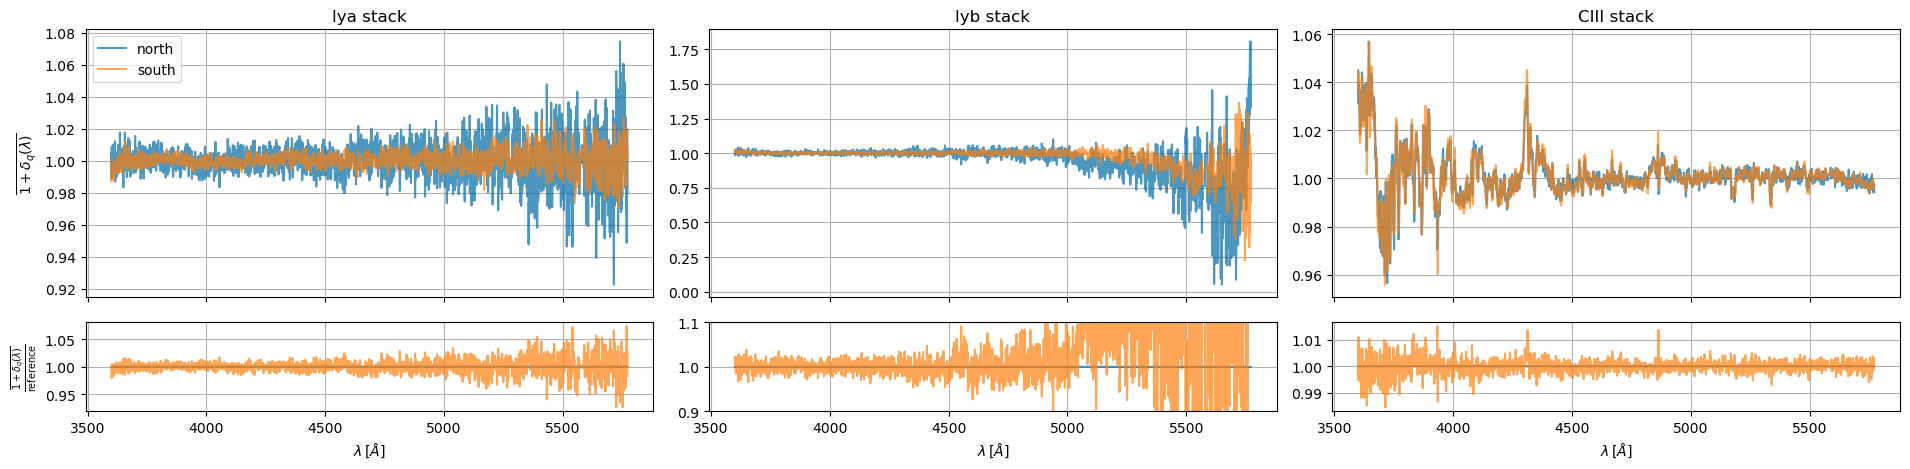

In [96]:
fig, axs = plt.subplots(
    2, 3, sharex="col", figsize=(6.4 * 3, 4.8), gridspec_kw={"height_ratios": [3, 1]}
)

axs = axs.T

for region, axcol in zip(("lya", "lyb", "CIII"), axs):
    if region == "CIII":
        calib_step = 1
    else:
        calib_step = None

    
    ax = axcol[0]
    for bkp in analyses:
        bkp.data = DeltasPlots.stack(
            bkp,
            region=region,
            calib_step=calib_step,
            ax=ax,
            plot_kwargs=dict(
                label=bkp.label,
                alpha=0.7,
                color=bkp.colour,
            ),
            # rebin=5,
            offset=offset,
        )
        offset += 0
    ax.legend()
    ax.grid(visible=True)

    ax = axcol[1]
    for bkp in analyses:
        ax.plot(
            bkp.data[0], bkp.data[1] / reference.data[1], alpha=0.7, color=bkp.colour
        )
    ax.grid(visible=True)
    ax.set_xlabel(axcol[0].get_xlabel())

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

    axcol[0].set_xlabel(None)

    axcol[0].set_title(f"{region} stack")

for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)
        legend = ax.legend()
        legend.remove()

axs[1][1].set_ylim(0.9, 1.1)
plt.tight_layout()

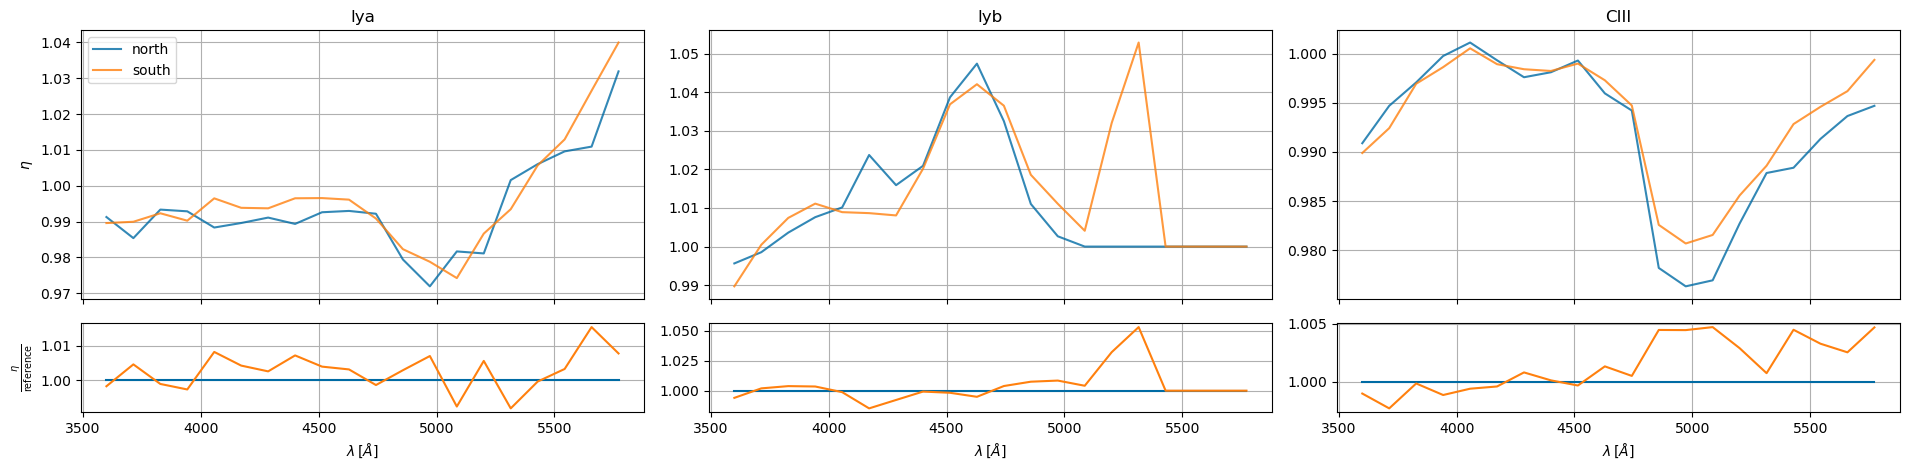

In [97]:
fig, axs = plt.subplots(
    2, 3, sharex="col", figsize=(6.4 * 3, 4.8), gridspec_kw={"height_ratios": [3, 1]}
)

axs = axs.T

for region, axcol in zip(("lya", "lyb", "CIII"), axs):
    if region == "CIII":
        calib_step = 1
    else:
        calib_step = None

    
    ax = axcol[0]
    for bkp in analyses:
        bkp.data = DeltasPlots.eta(
            bkp,
            region=region,
            calib_step=calib_step,
            ax=ax,
            plot_kwargs=dict(
                label=bkp.label,
                alpha=0.8,
                color=bkp.colour,
            ),
        )
    ax.legend()
    ax.grid(visible=True)

    ax = axcol[1]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            bkp.data[1] / reference.data[1],
            color=bkp.colour,
        )
    ax.grid(visible=True)
    ax.set_xlabel(axcol[0].get_xlabel())

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

    axcol[0].set_xlabel(None)

    axcol[0].set_title(rf"{region}")

for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)
        legend = ax.legend()
        legend.remove()

plt.tight_layout()

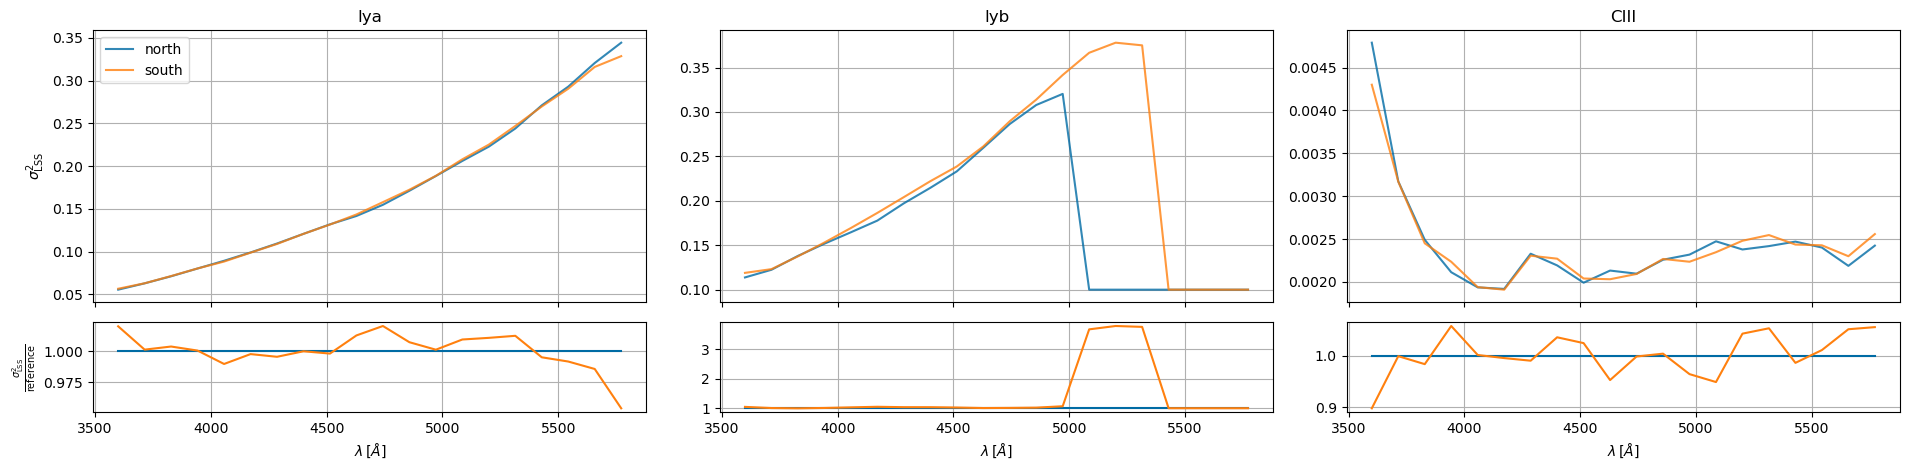

In [98]:
fig, axs = plt.subplots(
    2, 3, sharex="col", figsize=(6.4 * 3, 4.8), gridspec_kw={"height_ratios": [3, 1]}
)

axs = axs.T

for region, axcol in zip(("lya", "lyb", "CIII"), axs):
    if region == "CIII":
        calib_step = 1
    else:
        calib_step = None

    
    ax = axcol[0]
    for bkp in analyses:
        bkp.data = DeltasPlots.var_lss(
            bkp,
            region=region,
            calib_step=calib_step,
            ax=ax,
            plot_kwargs=dict(
                label=bkp.label,
                alpha=0.8,
                color=bkp.colour,
            ),
        )
    ax.legend()
    ax.grid(visible=True)

    ax = axcol[1]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            bkp.data[1] / reference.data[1],
        )
    ax.grid(visible=True)
    ax.set_xlabel(axcol[0].get_xlabel())

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

    axcol[0].set_xlabel(None)

    axcol[0].set_title(rf"{region}")

for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)
        legend = ax.legend()
        legend.remove()

plt.tight_layout()

/tmp/ipykernel_1550881/2339093360.py:34: RuntimeWarning: invalid value encountered in divide
  bkp.data[1] / reference.data[1],


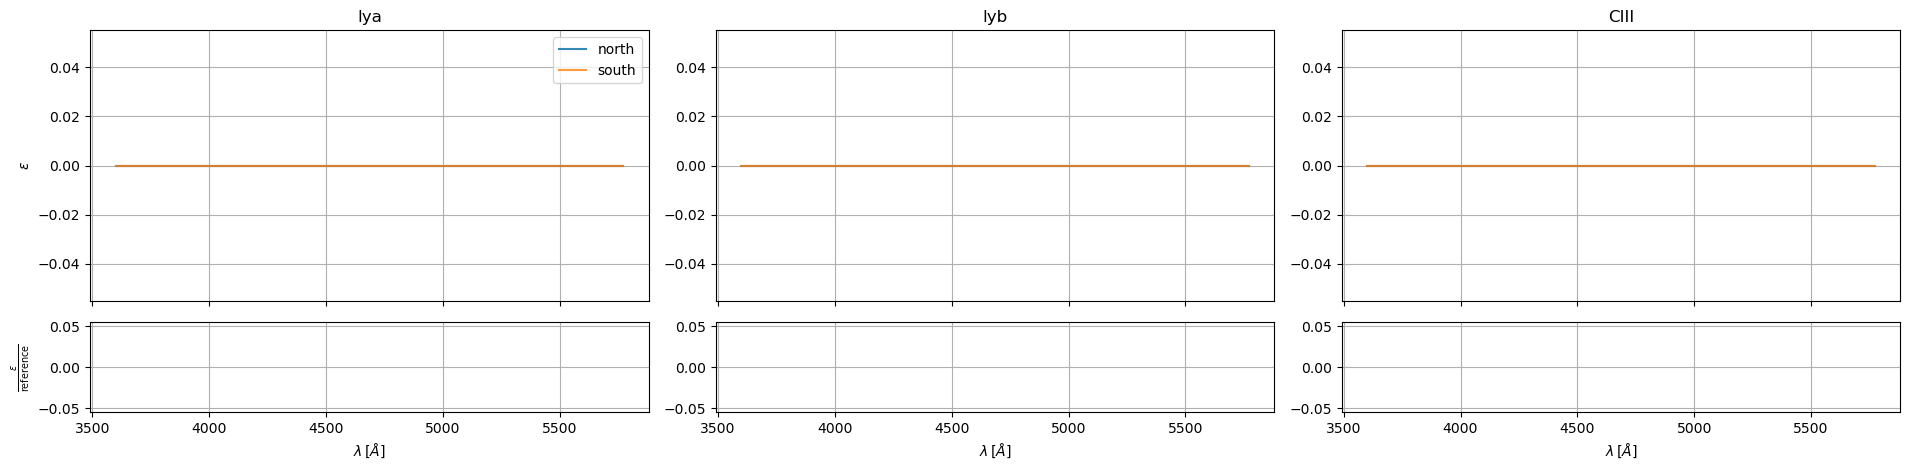

In [100]:
fig, axs = plt.subplots(
    2, 3, sharex="col", figsize=(6.4 * 3, 4.8), gridspec_kw={"height_ratios": [3, 1]}
)

axs = axs.T

for region, axcol in zip(("lya", "lyb", "CIII"), axs):
    if region == "CIII":
        calib_step = 1
    else:
        calib_step = None

    
    ax = axcol[0]
    for bkp in analyses:
        bkp.data = DeltasPlots.fudge(
            bkp,
            region=region,
            calib_step=calib_step,
            ax=ax,
            plot_kwargs=dict(
                label=bkp.label,
                alpha=0.8,
                color=bkp.colour,
            ),
        )
    ax.legend()
    ax.grid(visible=True)

    ax = axcol[1]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            bkp.data[1] / reference.data[1],
            color=bkp.colour,
        )
    ax.grid(visible=True)
    ax.set_xlabel(axcol[0].get_xlabel())

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

    axcol[0].set_xlabel(None)

    axcol[0].set_title(rf"{region}")

for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)
        legend = ax.legend()
        legend.remove()

plt.tight_layout()

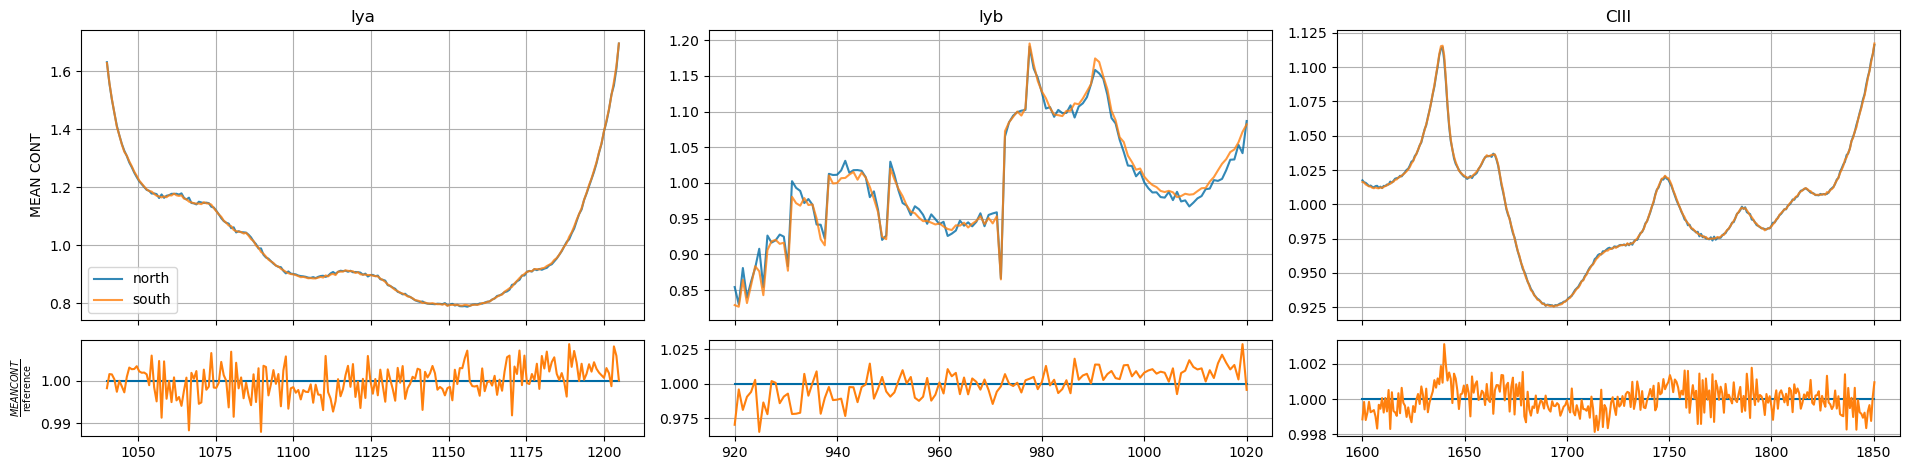

In [101]:
fig, axs = plt.subplots(
    2, 3, sharex="col", figsize=(6.4 * 3, 4.8), gridspec_kw={"height_ratios": [3, 1]}
)

axs = axs.T

for region, axcol in zip(("lya", "lyb", "CIII"), axs):
    if region == "CIII":
        calib_step = 1
    else:
        calib_step = None

    
    ax = axcol[0]
    for bkp in analyses:
        bkp.data = DeltasPlots.mean_cont(
            bkp,
            region=region,
            calib_step=calib_step,
            ax=ax,
            plot_kwargs=dict(
                label=bkp.label,
                alpha=0.8,
                color=bkp.colour,
            ),
        )
    ax.legend()
    ax.grid(visible=True)

    ax = axcol[1]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            bkp.data[1] / reference.data[1],
            color=bkp.colour,
        )
    ax.grid(visible=True)
    ax.set_xlabel(axcol[0].get_xlabel())

    axcol[0].set_ylabel("MEAN CONT")

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

    axcol[0].set_xlabel(None)

    axcol[0].set_title(rf"{region}")

for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)
        legend = ax.legend()
        legend.remove()

plt.tight_layout()

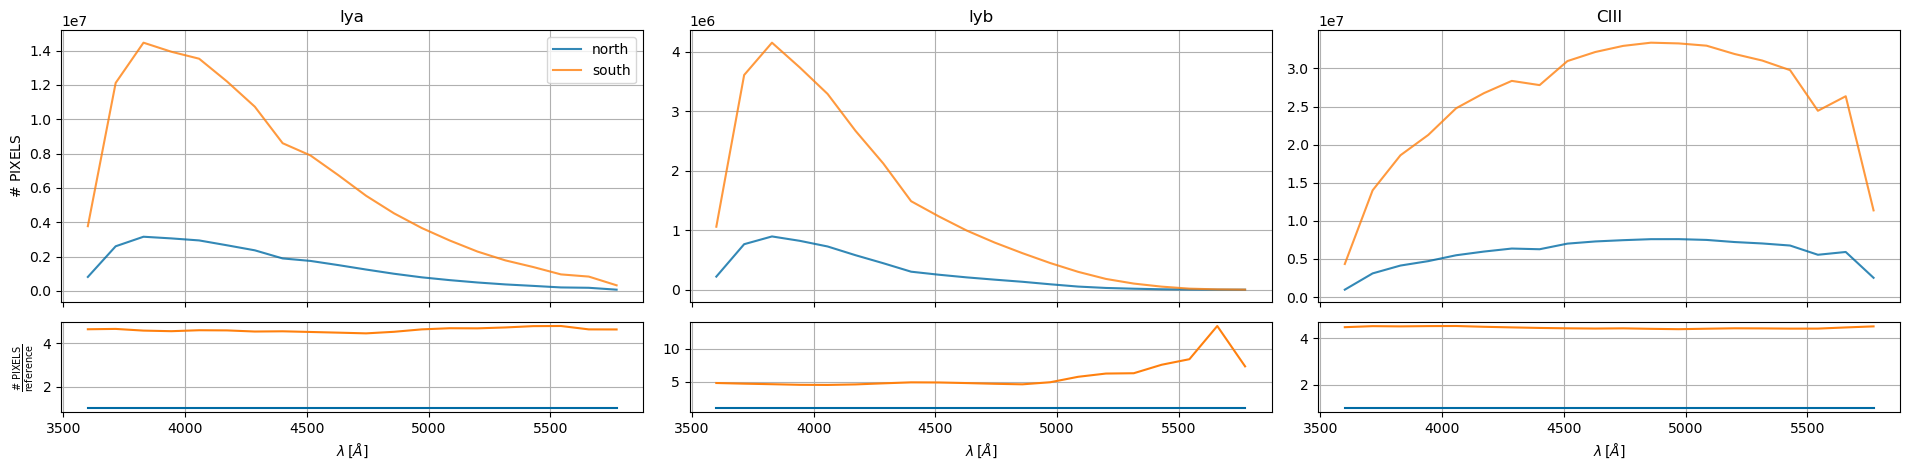

In [102]:
fig, axs = plt.subplots(
    2, 3, sharex="col", figsize=(6.4 * 3, 4.8), gridspec_kw={"height_ratios": [3, 1]}
)

axs = axs.T

for region, axcol in zip(("lya", "lyb", "CIII"), axs):
    if region == "CIII":
        calib_step = 1
    else:
        calib_step = None

    
    ax = axcol[0]
    for bkp in analyses:
        bkp.data = DeltasPlots.num_pixels(
            bkp,
            region=region,
            calib_step=calib_step,
            ax=ax,
            plot_kwargs=dict(
                label=bkp.label,
                alpha=0.8,
                color=bkp.colour,
            ),
        )
    ax.legend()
    ax.grid(visible=True)

    ax = axcol[1]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            bkp.data[1] / reference.data[1],
            color=bkp.colour,
        )
    ax.grid(visible=True)
    ax.set_xlabel(axcol[0].get_xlabel())

    axcol[0].set_ylabel(r"$\# \ {\rm PIXELS}$")

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

    axcol[0].set_xlabel(None)

    axcol[0].set_title(rf"{region}")

for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)
        legend = ax.legend()
        legend.remove()

plt.tight_layout()

# Correlation plots

In [10]:
from picca_bookkeeper.read_correlations import CorrelationPlots

from mpl_toolkits.axes_grid1 import make_axes_locatable

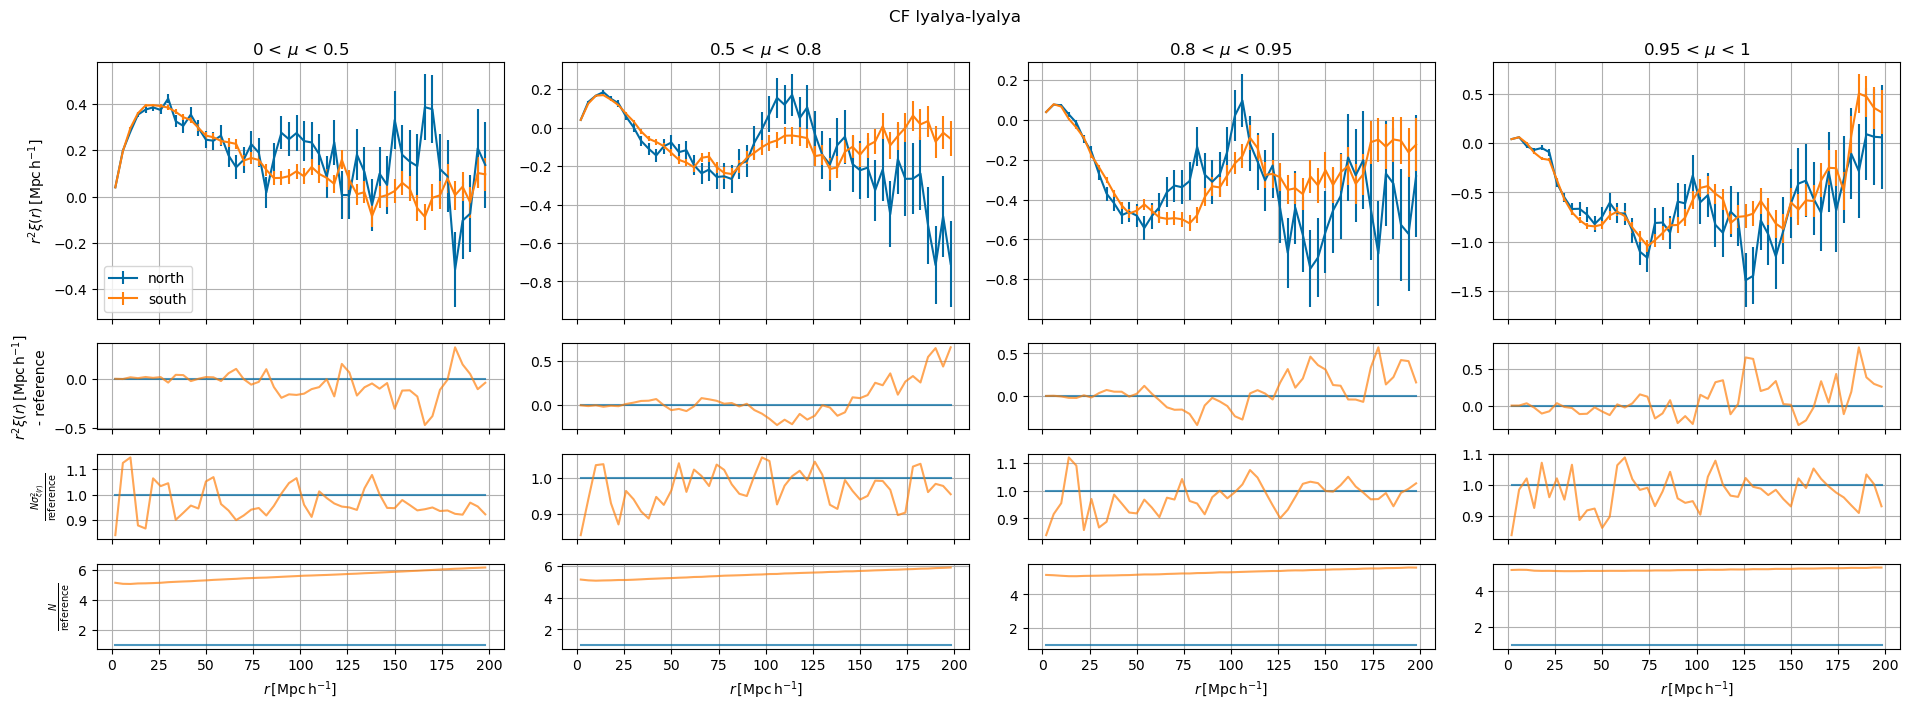

In [105]:
region = "lya"

fig, axs = plt.subplots(
    4,
    4,
    sharex="col",
    figsize=(6.4 * 3, 4.8 / 4 * 6),
    gridspec_kw={"height_ratios": [3, 1, 1, 1]},
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    
    ax = axcol[0]
    for bkp in analyses:
        bkp.data = CorrelationPlots.cf(
            bkp,
            region="lya",
            region2=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(label=bkp.label, color=bkp.colour),
        )

    ax = axcol[1]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            bkp.data[1] - reference.data[1],
            alpha=0.7,
            color=bkp.colour,
        )

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"${ylabel}$" + "\n- reference")
    ax.set_xlabel(None)

    ax = axcol[2]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            (bkp.data[2] ** 2 * bkp.data[3])
            / (reference.data[2] ** 2 * reference.data[3]),
            alpha=0.7,
            color=bkp.colour,
        )
    ax.set_ylabel(r"$\frac{N \sigma^2_{\xi (r)}}{\rm reference}$")
    ax.set_xlabel(None)

    ax = axcol[3]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            bkp.data[3] / reference.data[3],
            alpha=0.7,
            color=bkp.colour,
        )
    ax.set_ylabel(r"$\frac{N}{\rm reference}$")
    ax.set_xlabel(axcol[0].get_xlabel())

    axcol[0].set_xlabel(None)
    axcol[0].set_title(rf"{mumin} < $\mu$ < {mumax}")


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for ax in axs.reshape(-1):
    ax.grid(visible=True)

axs[0][0].legend()

plt.suptitle(f"CF lyalya-lya{region}")
plt.tight_layout()

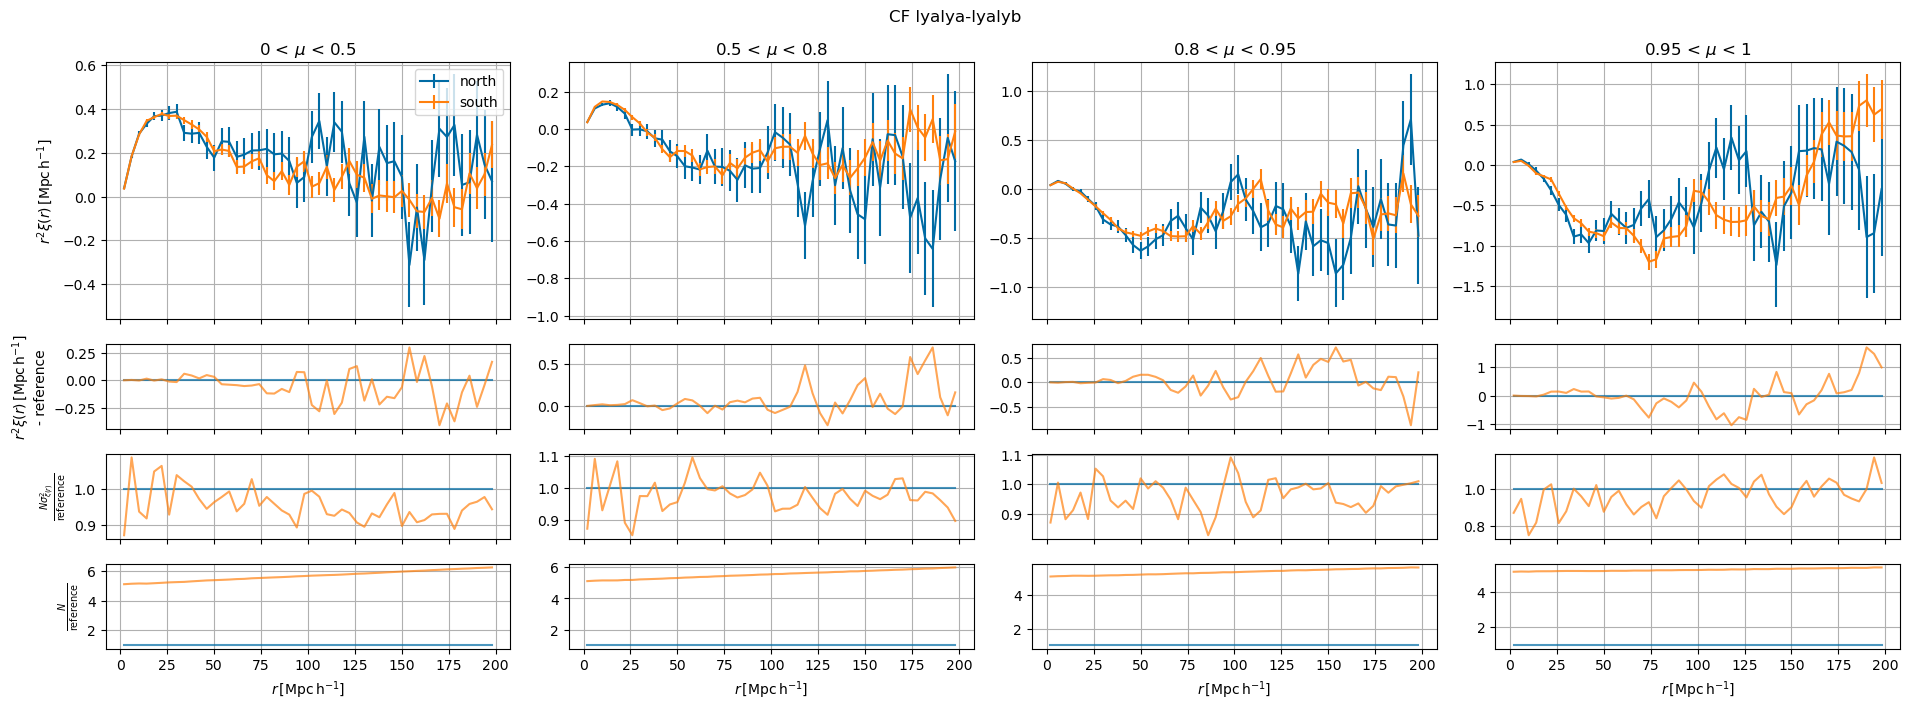

In [106]:
region = "lyb"

fig, axs = plt.subplots(
    4,
    4,
    sharex="col",
    figsize=(6.4 * 3, 4.8 / 4 * 6),
    gridspec_kw={"height_ratios": [3, 1, 1, 1]},
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    
    ax = axcol[0]
    for bkp in analyses:
        bkp.data = CorrelationPlots.cf(
            bkp,
            region="lya",
            region2=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(label=bkp.label, color=bkp.colour),
        )

    ax = axcol[1]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            bkp.data[1] - reference.data[1],
            alpha=0.7,
            color=bkp.colour,
        )

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"${ylabel}$" + "\n- reference")
    ax.set_xlabel(None)

    ax = axcol[2]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            (bkp.data[2] ** 2 * bkp.data[3])
            / (reference.data[2] ** 2 * reference.data[3]),
            alpha=0.7,
            color=bkp.colour,
        )
    ax.set_ylabel(r"$\frac{N \sigma^2_{\xi (r)}}{\rm reference}$")
    ax.set_xlabel(None)

    ax = axcol[3]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            bkp.data[3] / reference.data[3],
            alpha=0.7,
            color=bkp.colour,
        )
    ax.set_ylabel(r"$\frac{N}{\rm reference}$")
    ax.set_xlabel(axcol[0].get_xlabel())

    axcol[0].set_xlabel(None)
    axcol[0].set_title(rf"{mumin} < $\mu$ < {mumax}")


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for ax in axs.reshape(-1):
    ax.grid(visible=True)

axs[0][0].legend()

plt.suptitle(f"CF lyalya-lya{region}")
plt.tight_layout()

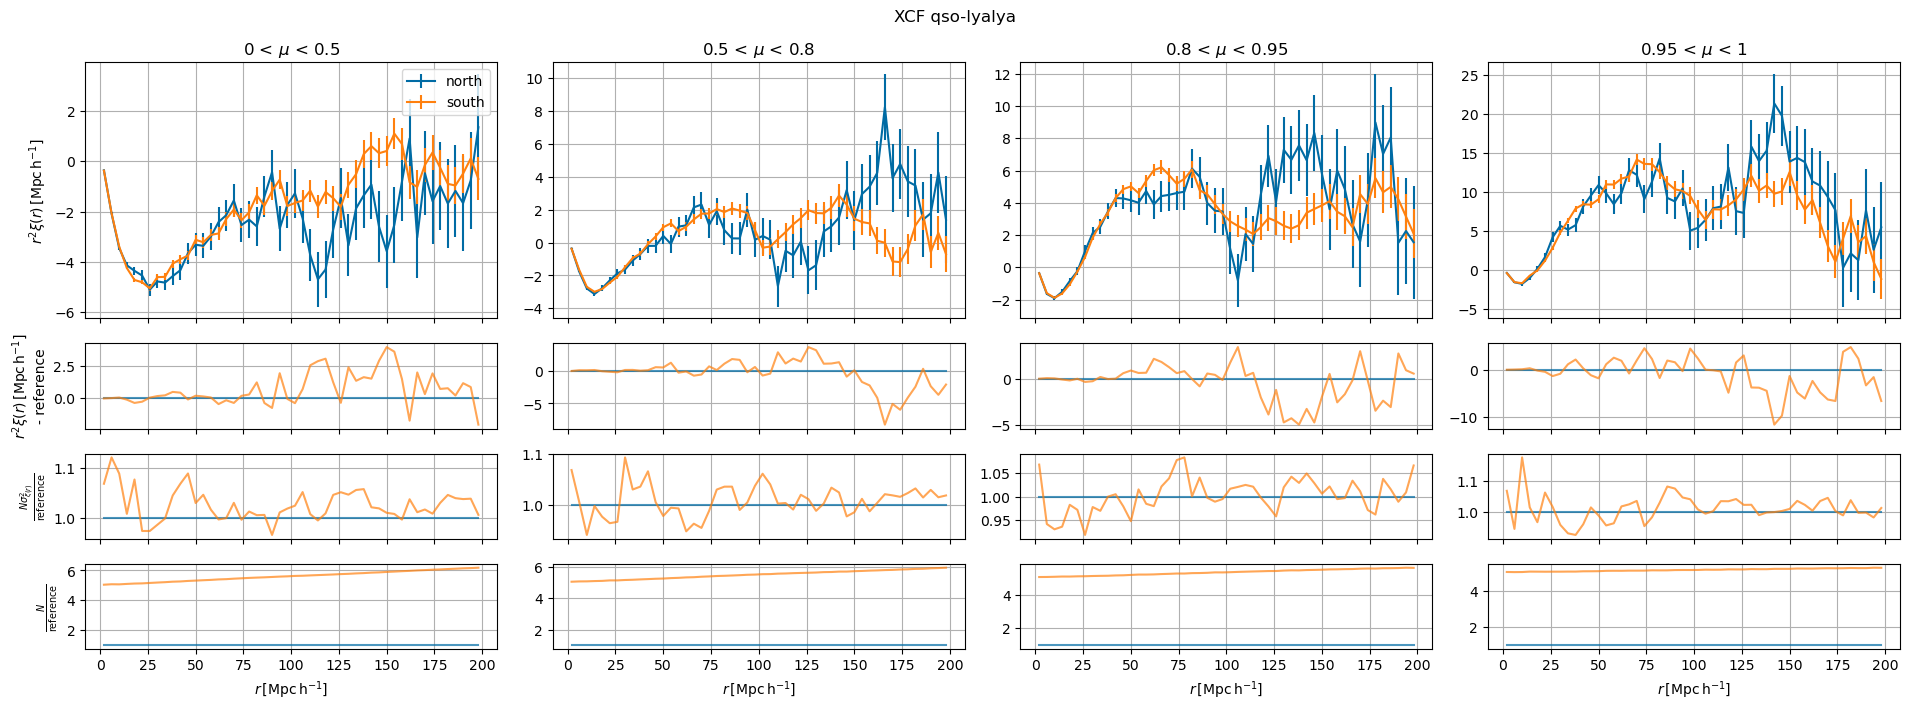

In [107]:
region = "lya"

fig, axs = plt.subplots(
    4,
    4,
    sharex="col",
    figsize=(6.4 * 3, 4.8 / 4 * 6),
    gridspec_kw={"height_ratios": [3, 1, 1, 1]},
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    
    ax = axcol[0]
    for bkp in analyses:
        bkp.data = CorrelationPlots.xcf(
            bkp,
            region=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(label=bkp.label, color=bkp.colour),
        )

    ax = axcol[1]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            bkp.data[1] - reference.data[1],
            alpha=0.7,
            color=bkp.colour,
        )

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"${ylabel}$" + "\n- reference")
    ax.set_xlabel(None)

    ax = axcol[2]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            (bkp.data[2] ** 2 * bkp.data[3])
            / (reference.data[2] ** 2 * reference.data[3]),
            alpha=0.7,
            color=bkp.colour,
        )
    ax.set_ylabel(r"$\frac{N \sigma^2_{\xi (r)}}{\rm reference}$")
    ax.set_xlabel(None)

    ax = axcol[3]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            bkp.data[3] / reference.data[3],
            alpha=0.7,
            color=bkp.colour,
        )
    ax.set_ylabel(r"$\frac{N}{\rm reference}$")
    ax.set_xlabel(axcol[0].get_xlabel())

    axcol[0].set_xlabel(None)
    axcol[0].set_title(rf"{mumin} < $\mu$ < {mumax}")


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for ax in axs.reshape(-1):
    ax.grid(visible=True)

axs[0][0].legend()

plt.suptitle(f"XCF qso-lya{region}")
plt.tight_layout()

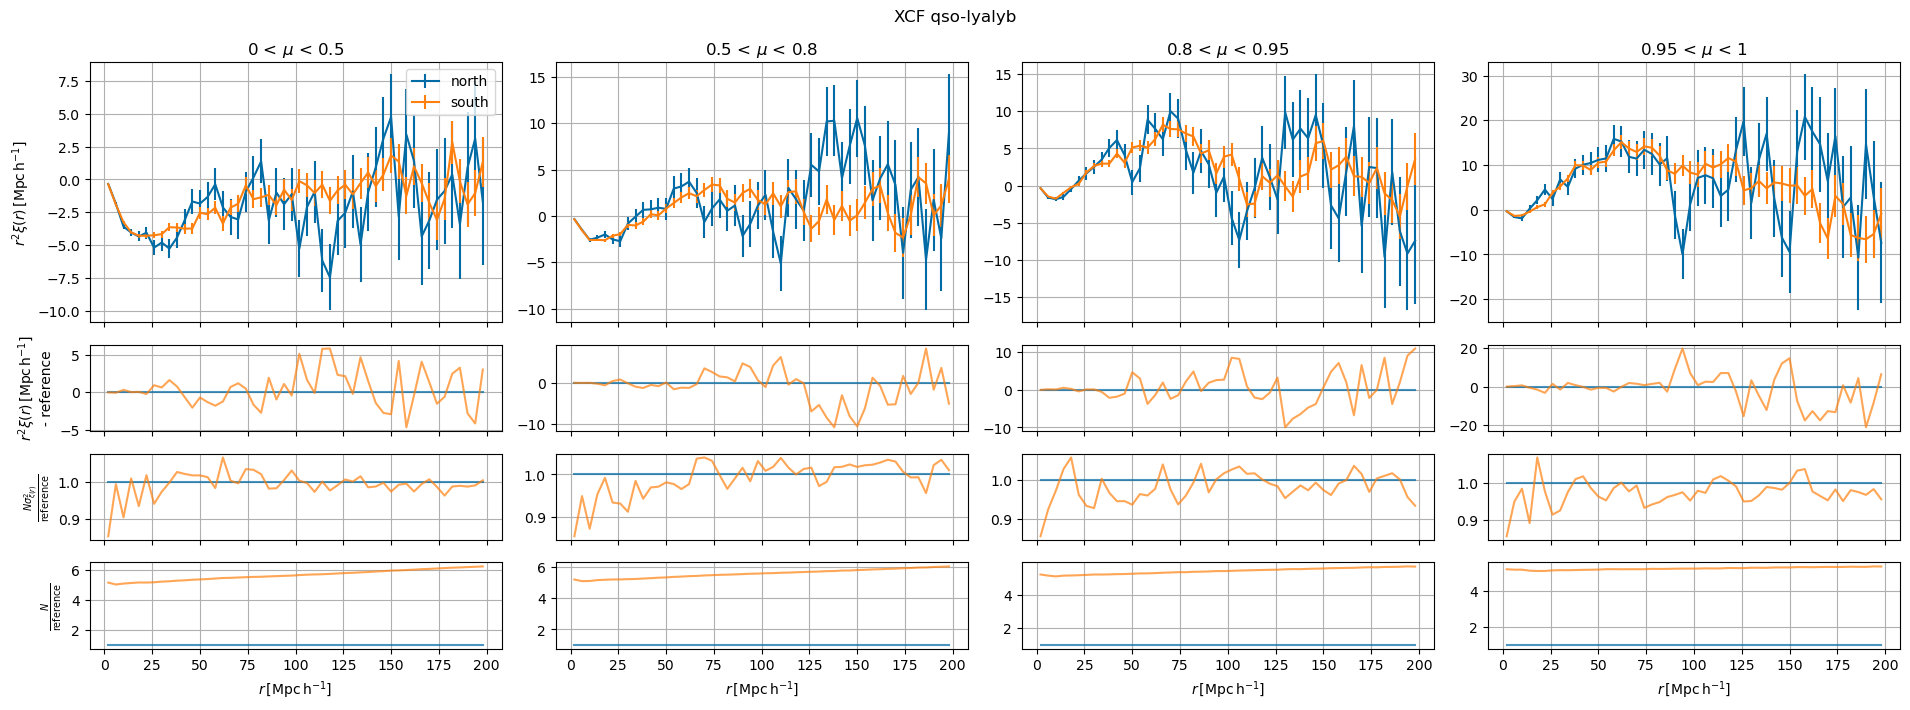

In [108]:
region = "lyb"

fig, axs = plt.subplots(
    4,
    4,
    sharex="col",
    figsize=(6.4 * 3, 4.8 / 4 * 6),
    gridspec_kw={"height_ratios": [3, 1, 1, 1]},
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    
    ax = axcol[0]
    for bkp in analyses:
        bkp.data = CorrelationPlots.xcf(
            bkp,
            region=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(label=bkp.label, color=bkp.colour),
        )

    ax = axcol[1]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            bkp.data[1] - reference.data[1],
            alpha=0.7,
            color=bkp.colour,
        )

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"${ylabel}$" + "\n- reference")
    ax.set_xlabel(None)

    ax = axcol[2]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            (bkp.data[2] ** 2 * bkp.data[3])
            / (reference.data[2] ** 2 * reference.data[3]),
            alpha=0.7,
            color=bkp.colour,
        )
    ax.set_ylabel(r"$\frac{N \sigma^2_{\xi (r)}}{\rm reference}$")
    ax.set_xlabel(None)

    ax = axcol[3]
    for bkp in analyses:
        ax.plot(
            bkp.data[0],
            bkp.data[3] / reference.data[3],
            alpha=0.7,
            color=bkp.colour,
        )
    ax.set_ylabel(r"$\frac{N}{\rm reference}$")
    ax.set_xlabel(axcol[0].get_xlabel())

    axcol[0].set_xlabel(None)
    axcol[0].set_title(rf"{mumin} < $\mu$ < {mumax}")


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for ax in axs.reshape(-1):
    ax.grid(visible=True)

axs[0][0].legend()

plt.suptitle(f"XCF qso-lya{region}")
plt.tight_layout()

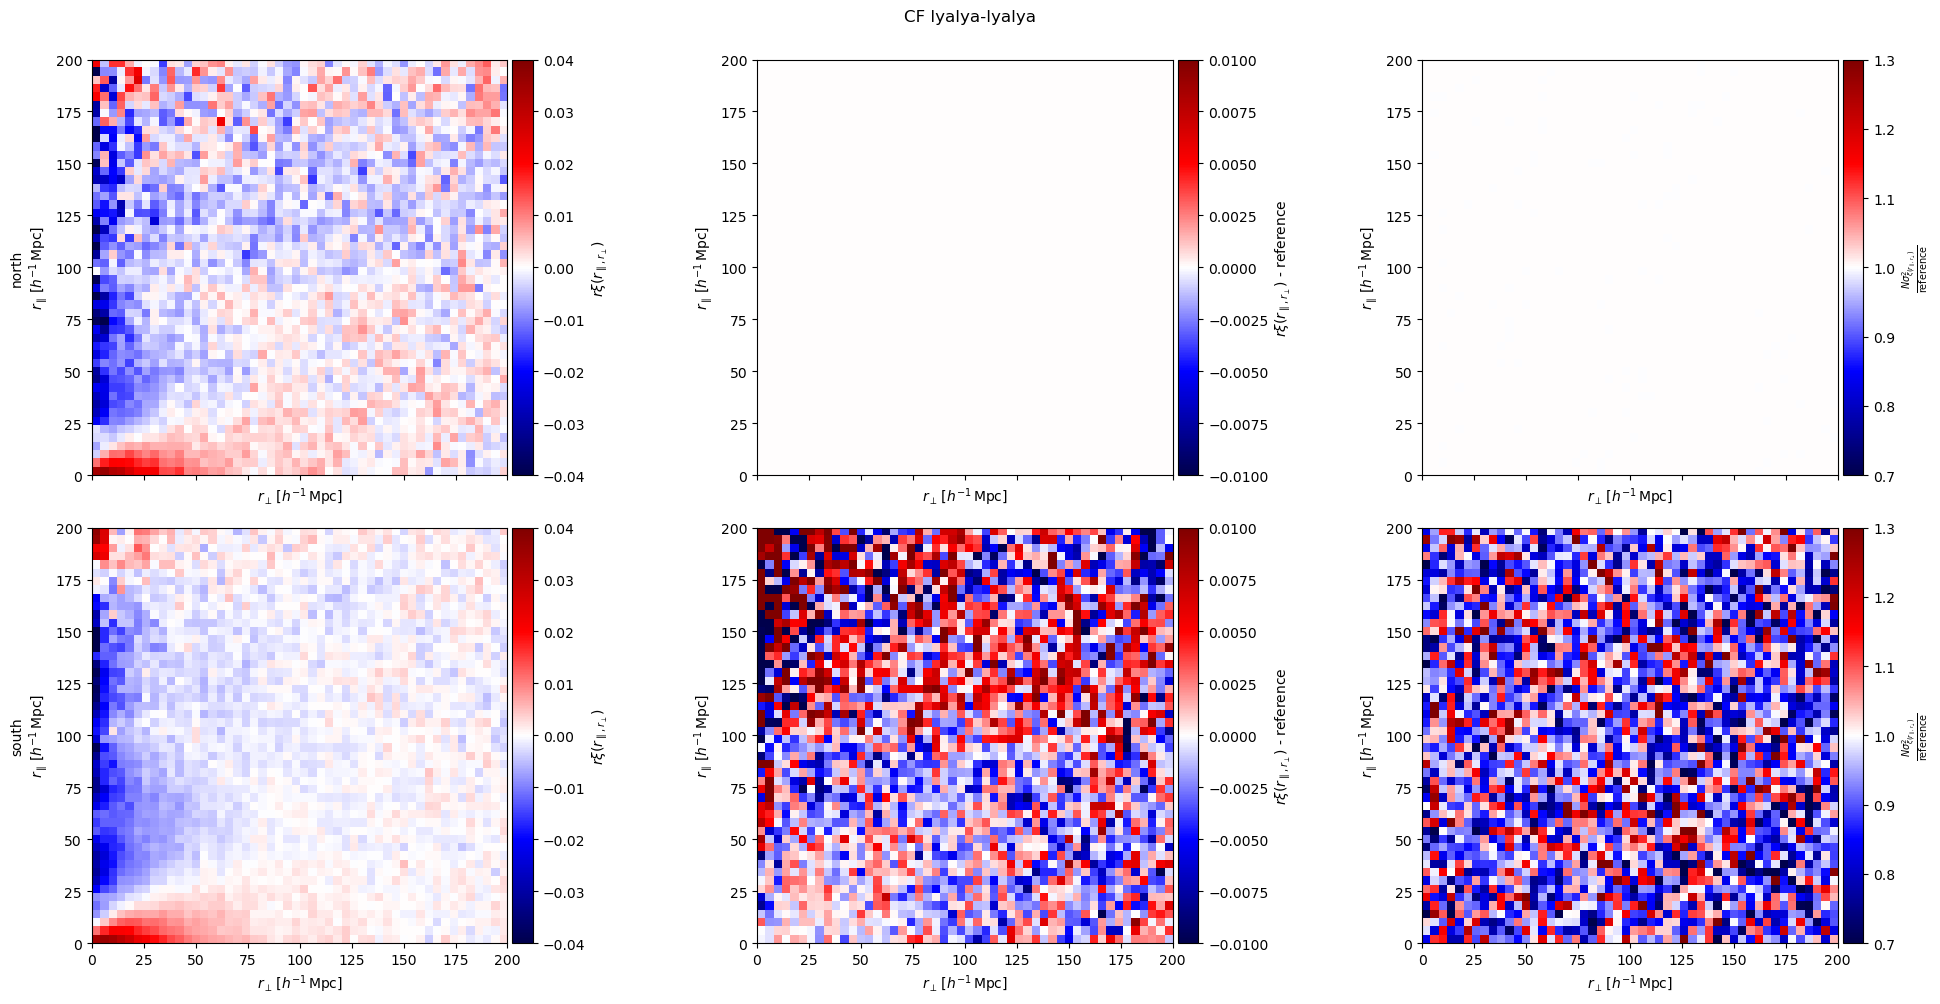

In [12]:
region = "lya"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col
    figsize=(20, 5 * len(analyses)),
)


for bkp in analyses:
    bkp.data = CorrelationPlots.cf_map(
        bkp,
        region="lya",
        region2=region,
        r_factor=1,
        just_return_values=True,
    )

for axrow, bkp in zip(axs, analyses):
    ax = axrow[0]
    im = ax.imshow(
        bkp.data[1],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.04,
        vmax=0.04,
    )

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(bkp.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = axrow[1]
    im = ax.imshow(
        bkp.data[1] - reference.data[1],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.01,
        vmax=0.01,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$ - reference")

    ax = axrow[2]
    im = ax.imshow(
        bkp.data[2] ** 2 * bkp.data[3] / reference.data[2] ** 2 / reference.data[3],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=0.7,
        vmax=1.3,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{N \sigma^2_{\xi(r_{\parallel,r_{\perp}})}}{\rm reference}$")

plt.suptitle(f"CF lyalya-lya{region}", y=1)
plt.tight_layout()

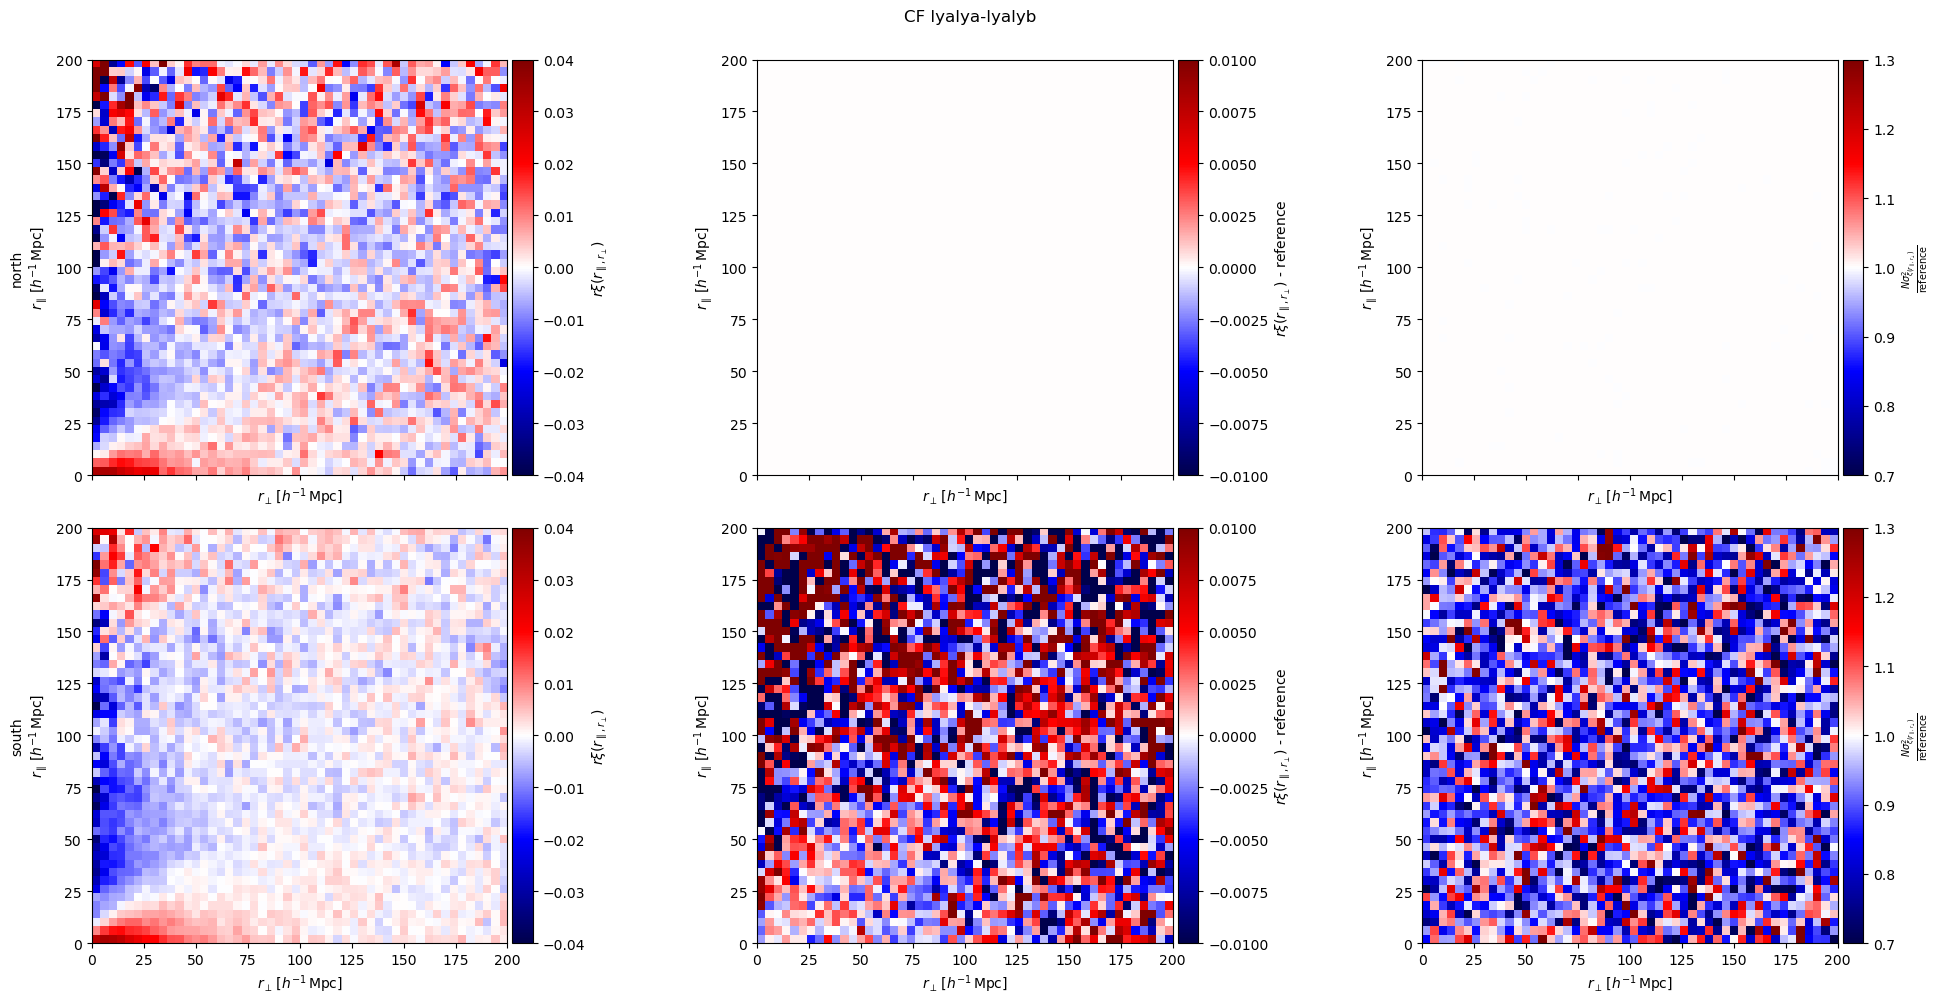

In [13]:
region = "lyb"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col",
    figsize=(20, 5 * len(analyses)),
)


for bkp in analyses:
    bkp.data = CorrelationPlots.cf_map(
        bkp,
        region="lya",
        region2=region,
        r_factor=1,
        just_return_values=True,
    )

for axrow, bkp in zip(axs, analyses):
    ax = axrow[0]
    im = ax.imshow(
        bkp.data[1],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.04,
        vmax=0.04,
    )

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(bkp.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = axrow[1]
    im = ax.imshow(
        bkp.data[1] - reference.data[1],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.01,
        vmax=0.01,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$ - reference")

    ax = axrow[2]
    im = ax.imshow(
        bkp.data[2] ** 2 * bkp.data[3] / reference.data[2] ** 2 / reference.data[3],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=0.7,
        vmax=1.3,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{N \sigma^2_{\xi(r_{\parallel,r_{\perp}})}}{\rm reference}$")

plt.suptitle(f"CF lyalya-lya{region}", y=1)
plt.tight_layout()

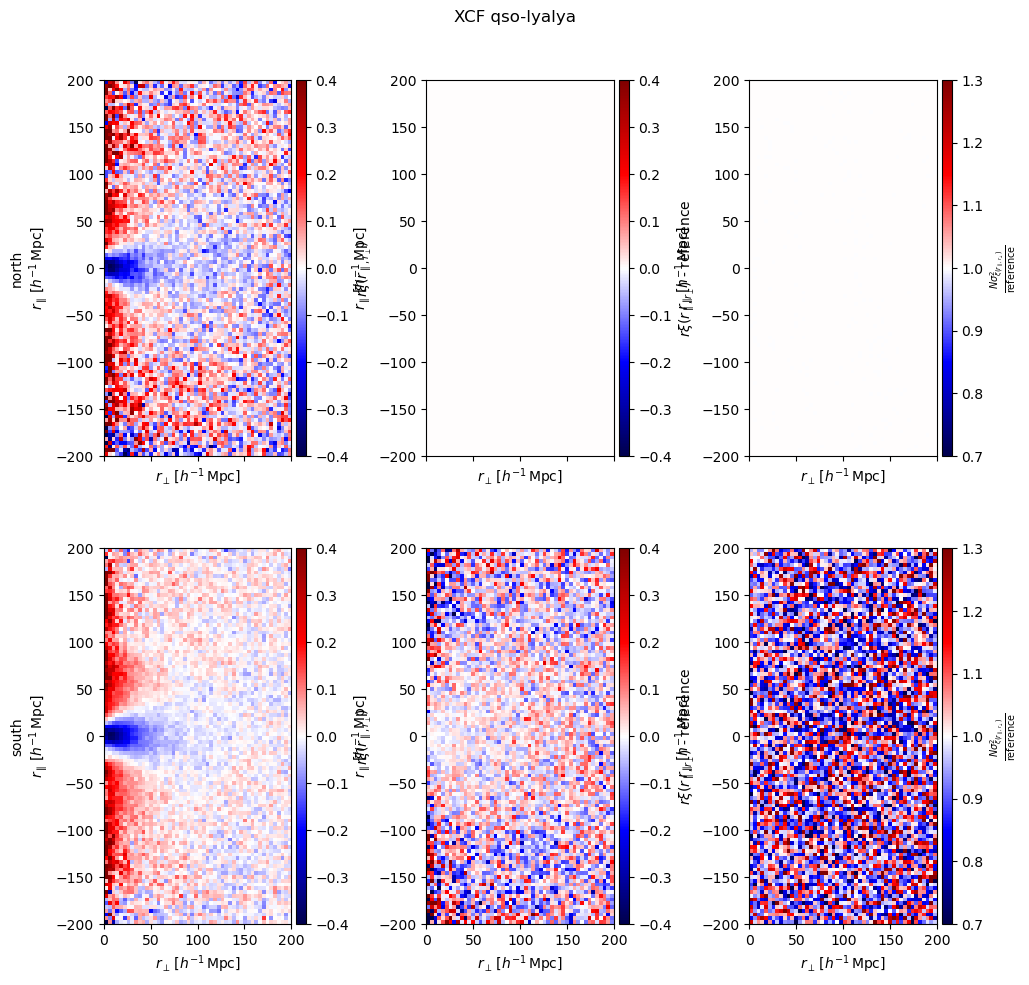

In [16]:
region = "lya"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col",
    figsize=(13, 5 * len(analyses)),
)

axs = axs


for bkp in analyses:
    bkp.data = CorrelationPlots.xcf_map(
        bkp,
        region=region,
        r_factor=1,
        just_return_values=True,
    )

for axrow, bkp in zip(axs, analyses):
    ax = axrow[0]
    im = ax.imshow(
        bkp.data[1],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(bkp.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = axrow[1]
    im = ax.imshow(
        bkp.data[1] - reference.data[1],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$ - reference")

    ax = axrow[2]
    im = ax.imshow(
        bkp.data[2] ** 2 * bkp.data[3] / reference.data[2] ** 2 / reference.data[3],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=0.7,
        vmax=1.3,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{N \sigma^2_{\xi(r_{\parallel,r_{\perp}})}}{\rm reference}$")

plt.suptitle(f"XCF qso-lya{region}", y=1)
plt.tight_layout()

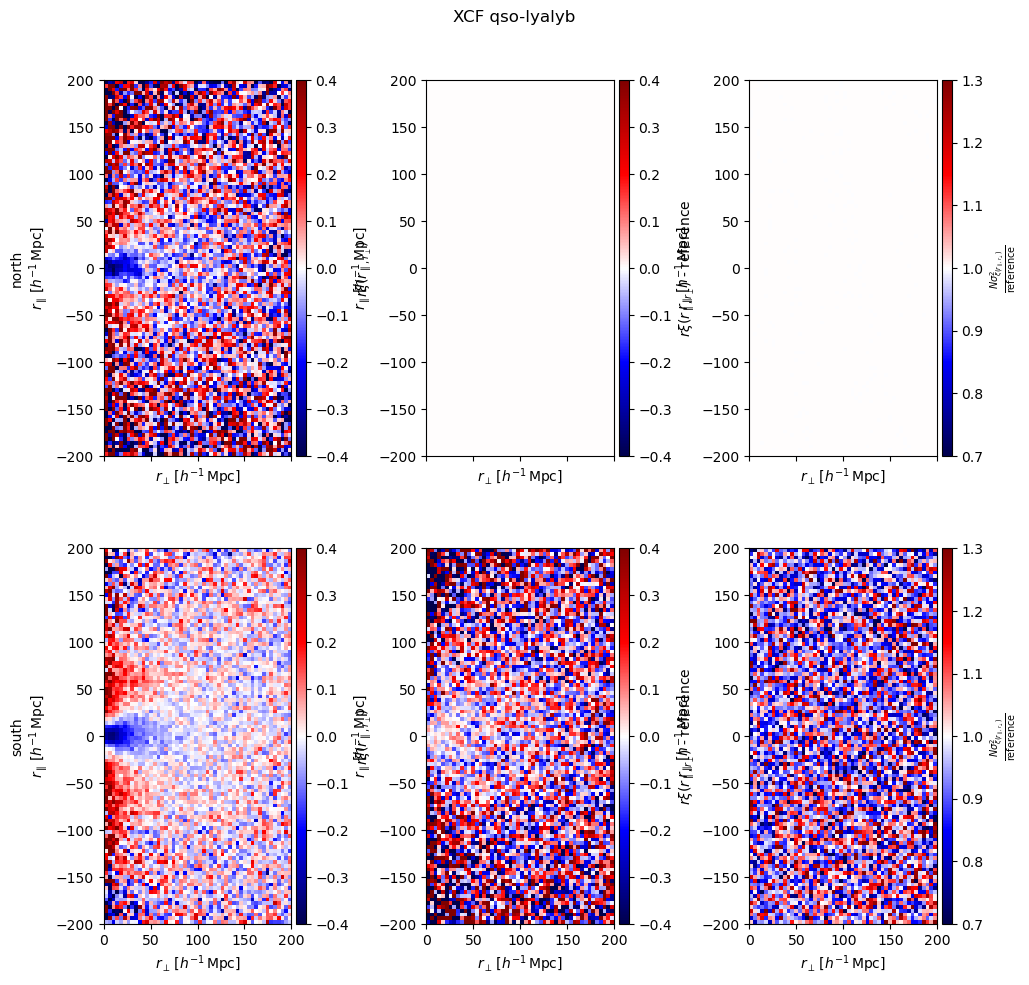

In [17]:
region = "lyb"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col",
    figsize=(13, 5 * len(analyses)),
)

axs = axs


for bkp in analyses:
    bkp.data = CorrelationPlots.xcf_map(
        bkp,
        region=region,
        r_factor=1,
        just_return_values=True,
    )

for axrow, bkp in zip(axs, analyses):
    ax = axrow[0]
    im = ax.imshow(
        bkp.data[1],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(bkp.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = axrow[1]
    im = ax.imshow(
        bkp.data[1] - reference.data[1],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$ - reference")

    ax = axrow[2]
    im = ax.imshow(
        bkp.data[2] ** 2 * bkp.data[3] / reference.data[2] ** 2 / reference.data[3],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=0.7,
        vmax=1.3,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{N \sigma^2_{\xi(r_{\parallel,r_{\perp}})}}{\rm reference}$")

plt.suptitle(f"XCF qso-lya{region}", y=1)
plt.tight_layout()

# Fits

## Model plots

In [22]:
from picca_bookkeeper.read_fits import FitPlots, ReadFits

### Row-per analysis

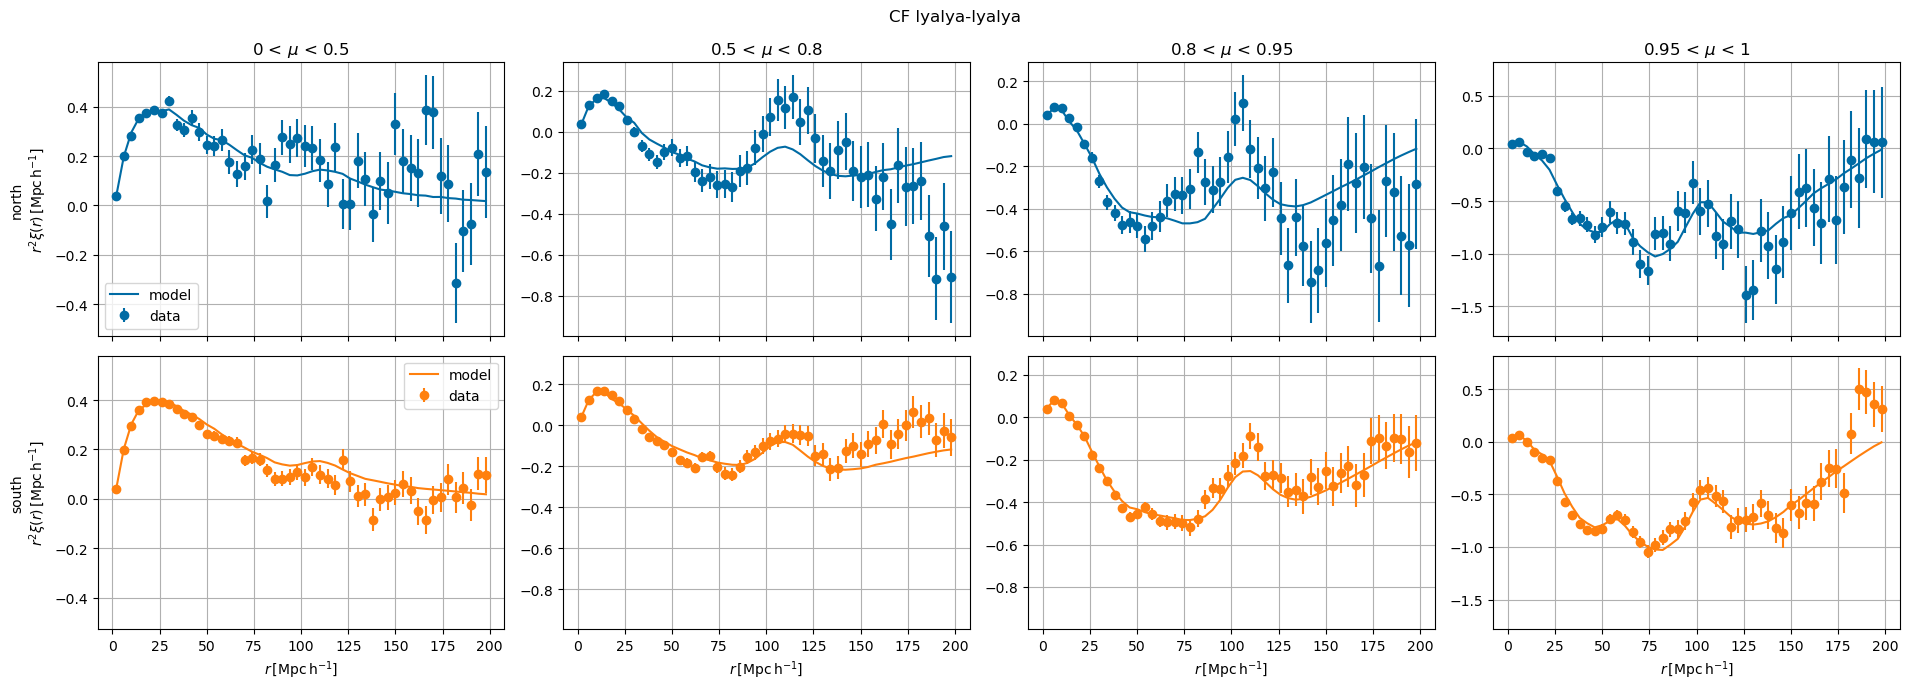

In [24]:
region = "lya"

fig, axs = plt.subplots(
    len(analyses),
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5 * len(analyses)),
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    for i, (bkp, ax) in enumerate(zip(analyses, axcol)):
        CorrelationPlots.cf(
            bkp,
            region="lya",
            region2=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(fmt="o", label="data", c=bkp.colour),
        )

        FitPlots.cf_model(
            bkp,
            region="lya",
            region2=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(label="model", c=bkp.colour),
        )


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for axrow in axs.T[:-1]:
    for ax in axrow:
        ax.set_xlabel(None)

for axrow in axs.T[1:]:
    for ax in axrow:
        ax.set_title(None)

for ax in axs[0]:
    ax.legend()

for ax in axs.reshape(-1):
    ax.grid(visible=True)

axs[0][0].set_ylabel("north\n" + axs[0][0].get_ylabel())
axs[0][1].set_ylabel("south\n" + axs[0][1].get_ylabel())

plt.suptitle("CF lyalya-lyalya")
plt.tight_layout()

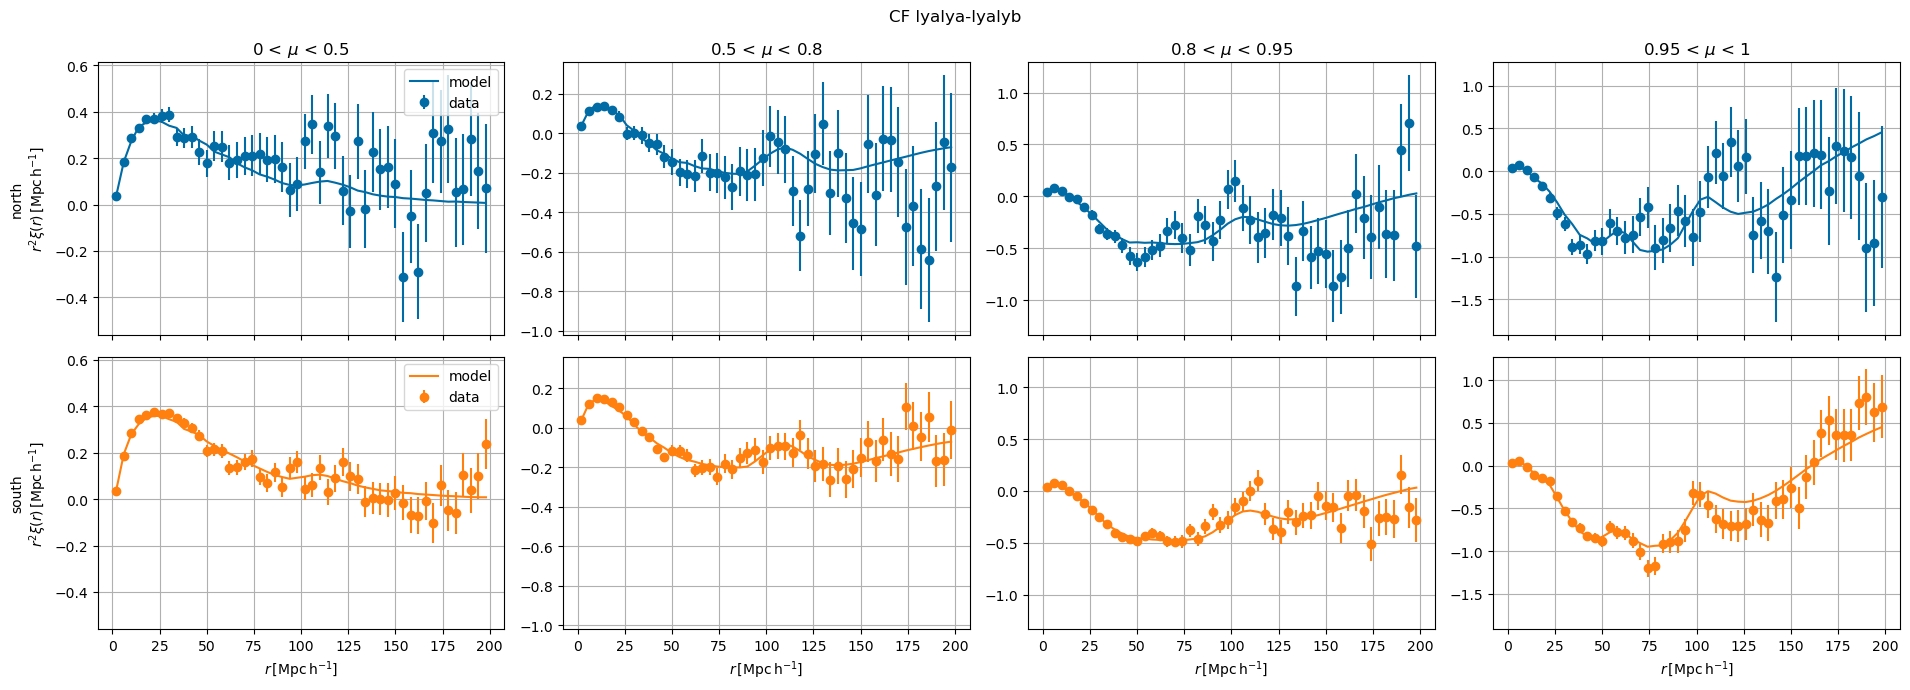

In [26]:
region = "lyb"

fig, axs = plt.subplots(
    len(analyses),
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5 * len(analyses)),
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    for i, (bkp, ax) in enumerate(zip(analyses, axcol)):
        CorrelationPlots.cf(
            bkp,
            region="lya",
            region2=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(fmt="o", label="data", c=bkp.colour),
        )

        FitPlots.cf_model(
            bkp,
            region="lya",
            region2=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(label="model", c=bkp.colour),
        )


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for axrow in axs.T[:-1]:
    for ax in axrow:
        ax.set_xlabel(None)

for axrow in axs.T[1:]:
    for ax in axrow:
        ax.set_title(None)

for ax in axs[0]:
    ax.legend()

for ax in axs.reshape(-1):
    ax.grid(visible=True)

axs[0][0].set_ylabel("north\n" + axs[0][0].get_ylabel())
axs[0][1].set_ylabel("south\n" + axs[0][1].get_ylabel())

plt.suptitle(f"CF lyalya-lya{region}")
plt.tight_layout()

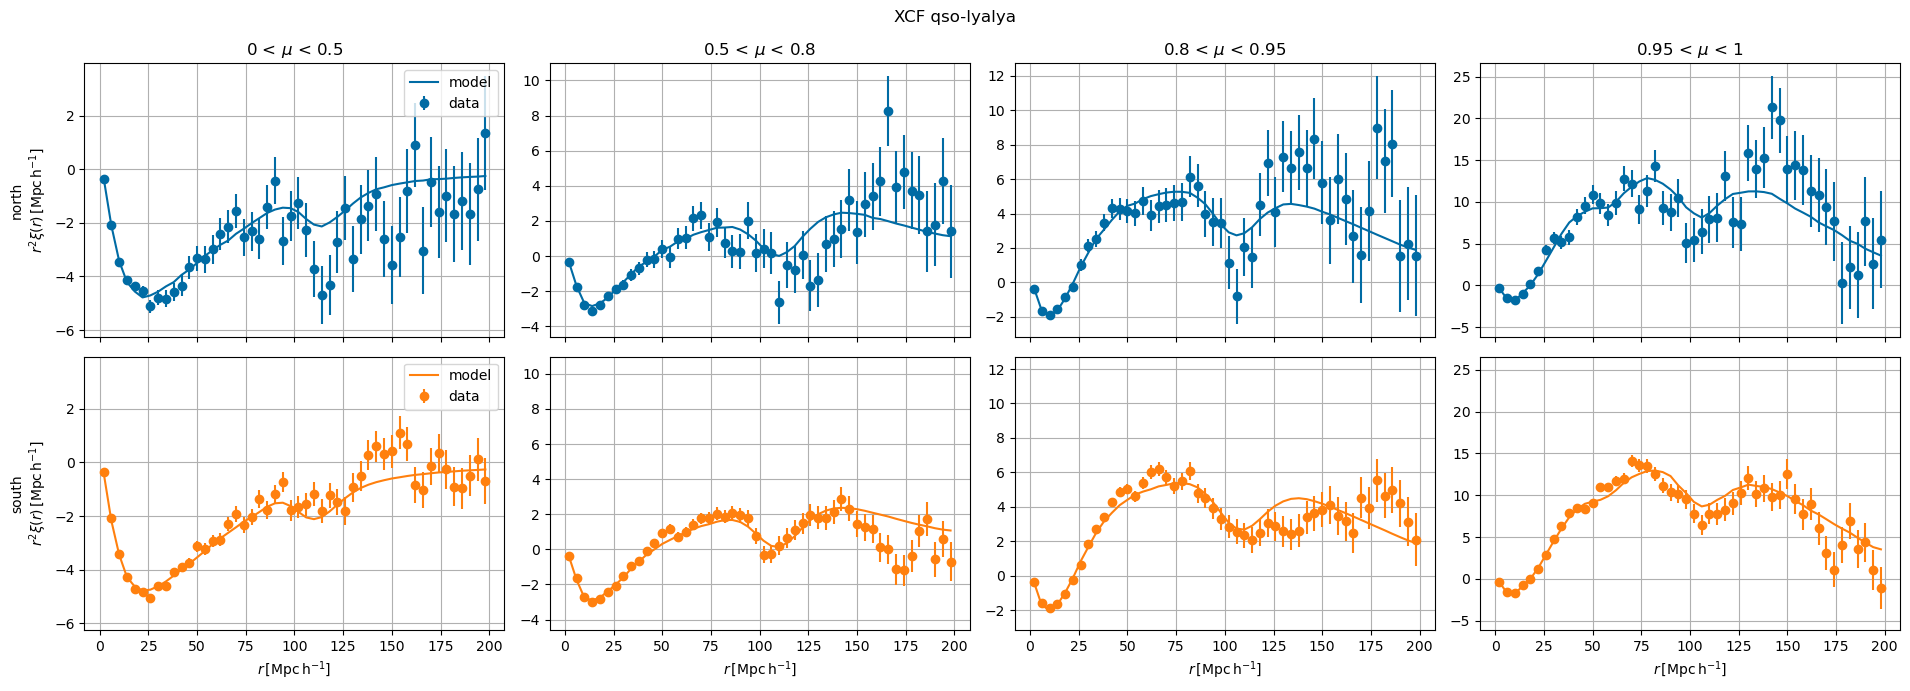

In [27]:
region = "lya"

fig, axs = plt.subplots(
    len(analyses),
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5 * len(analyses)),
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    for i, (bkp, ax) in enumerate(zip(analyses, axcol)):
        CorrelationPlots.xcf(
            bkp,
            region=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(fmt="o", label="data", c=bkp.colour),
        )

        FitPlots.xcf_model(
            bkp,
            region=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(label="model", c=bkp.colour),
        )


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for ax in axs.T[:-1].reshape(-1):
    ax.set_xlabel(None)

for ax in axs.T[1:].reshape(-1):
    ax.set_title(None)

for ax in axs[0]:
    ax.legend()

for ax in axs.reshape(-1):
    ax.grid(visible=True)

axs[0][0].set_ylabel("north\n" + axs[0][0].get_ylabel())
axs[0][1].set_ylabel("south\n" + axs[0][1].get_ylabel())

plt.suptitle(f"XCF qso-lya{region}")
plt.tight_layout()

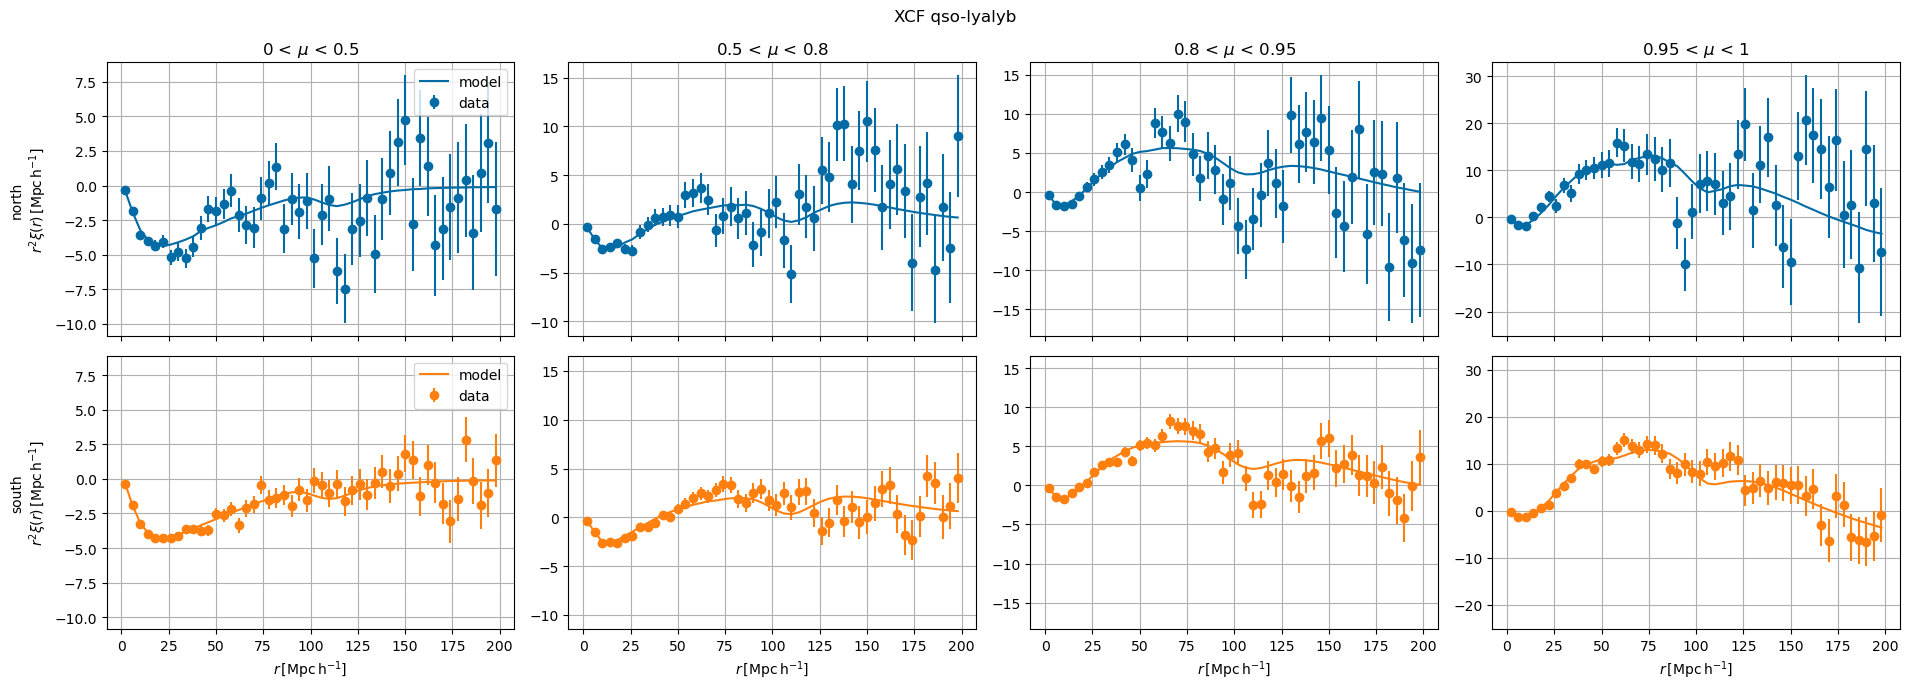

In [28]:
region = "lyb"

fig, axs = plt.subplots(
    len(analyses),
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5 * len(analyses)),
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    for i, (bkp, ax) in enumerate(zip(analyses, axcol)):
        CorrelationPlots.xcf(
            bkp,
            region=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(fmt="o", label="data", c=bkp.colour),
        )

        FitPlots.xcf_model(
            bkp,
            region=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(label="model", c=bkp.colour),
        )


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for ax in axs.T[:-1].reshape(-1):
    ax.set_xlabel(None)

for ax in axs.T[1:].reshape(-1):
    ax.set_title(None)

for ax in axs[0]:
    ax.legend()

for ax in axs.reshape(-1):
    ax.grid(visible=True)

axs[0][0].set_ylabel("north\n" + axs[0][0].get_ylabel())
axs[0][1].set_ylabel("south\n" + axs[0][1].get_ylabel())

plt.suptitle(f"XCF qso-lya{region}")
plt.tight_layout()

### Single correlation. Multiple fits

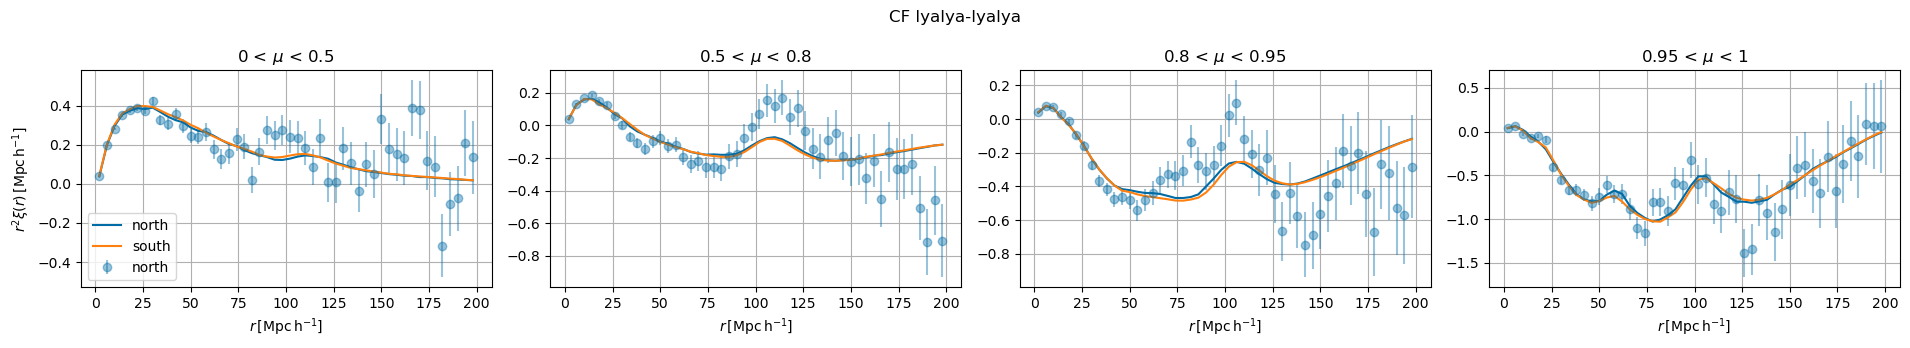

In [34]:
region = "lya"

fig, axs = plt.subplots(
    1,
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5),
)


mus = [0, 0.5, 0.8, 0.95, 1]


for mumin, mumax, ax in zip(mus[:-1], mus[1:], axs):
    CorrelationPlots.cf(
        reference,
        region="lya",
        region2=region,
        r_factor=2,
        ax=ax,
        mumin=mumin,
        mumax=mumax,
        plot_kwargs=dict(fmt="o", label=reference.label, c=reference.colour, alpha=0.4),
    )
    for i, bkp in enumerate(analyses):
        FitPlots.cf_model(
            bkp,
            region="lya",
            region2=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(label=bkp.label, c=bkp.colour),
        )


for ax in axs[1:]:
    ax.set_ylabel(None)

for ax in axs.reshape(-1):
    ax.grid(visible=True)

axs[0].legend()

plt.suptitle(f"CF lyalya-lya{region}")
plt.tight_layout()

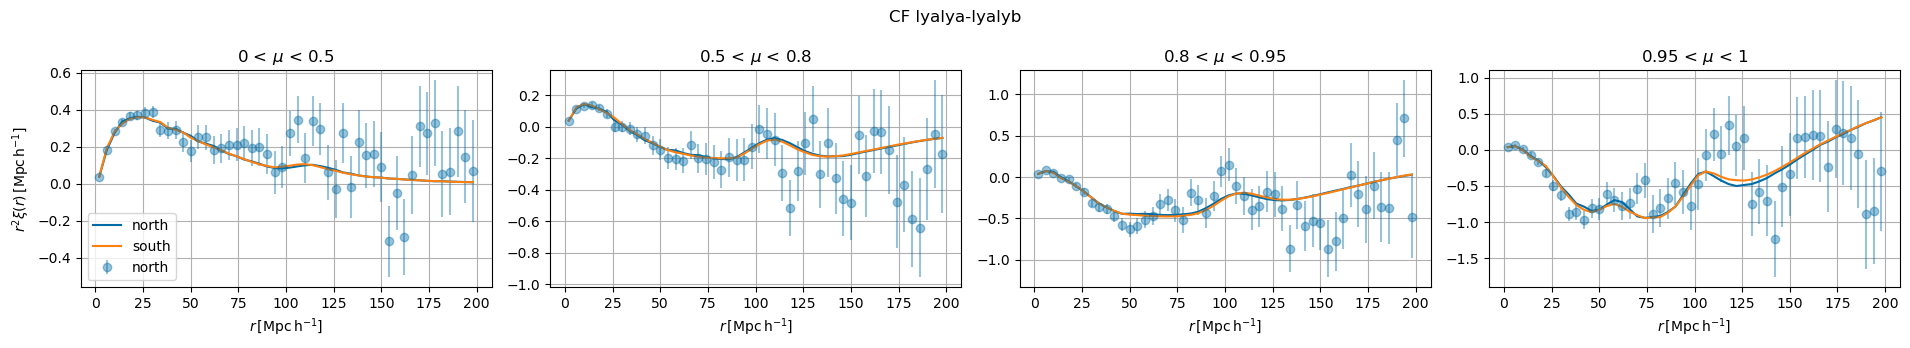

In [35]:
region = "lyb"

fig, axs = plt.subplots(
    1,
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5),
)


mus = [0, 0.5, 0.8, 0.95, 1]


for mumin, mumax, ax in zip(mus[:-1], mus[1:], axs):
    CorrelationPlots.cf(
        reference,
        region="lya",
        region2=region,
        r_factor=2,
        ax=ax,
        mumin=mumin,
        mumax=mumax,
        plot_kwargs=dict(fmt="o", label=reference.label, c=reference.colour, alpha=0.4),
    )
    for i, bkp in enumerate(analyses):
        FitPlots.cf_model(
            bkp,
            region="lya",
            region2=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(label=bkp.label, c=bkp.colour),
        )


for ax in axs[1:]:
    ax.set_ylabel(None)

for ax in axs.reshape(-1):
    ax.grid(visible=True)

axs[0].legend()

plt.suptitle(f"CF lyalya-lya{region}")
plt.tight_layout()

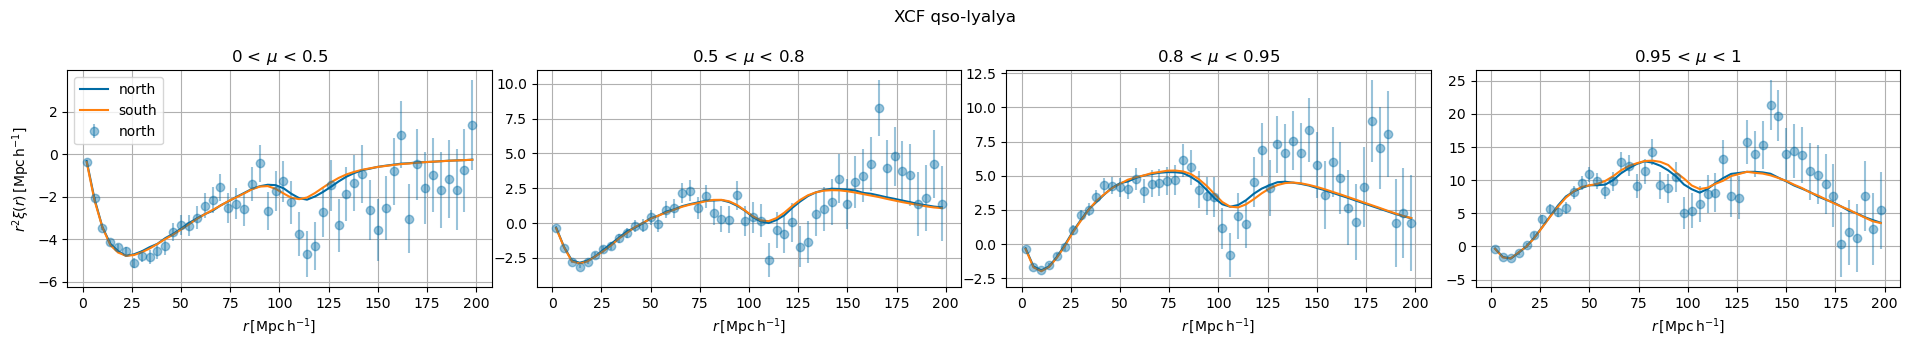

In [36]:
region = "lya"

fig, axs = plt.subplots(
    1,
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5),
)


mus = [0, 0.5, 0.8, 0.95, 1]


for mumin, mumax, ax in zip(mus[:-1], mus[1:], axs):
    CorrelationPlots.xcf(
        reference,
        region=region,
        r_factor=2,
        ax=ax,
        mumin=mumin,
        mumax=mumax,
        plot_kwargs=dict(fmt="o", label=reference.label, c=reference.colour, alpha=0.4),
    )
    for i, bkp in enumerate(analyses):
        FitPlots.xcf_model(
            bkp,
            region=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(label=bkp.label, c=bkp.colour),
        )


for ax in axs[1:]:
    ax.set_ylabel(None)

for ax in axs.reshape(-1):
    ax.grid(visible=True)

axs[0].legend()

plt.suptitle(f"XCF qso-lya{region}")
plt.tight_layout()

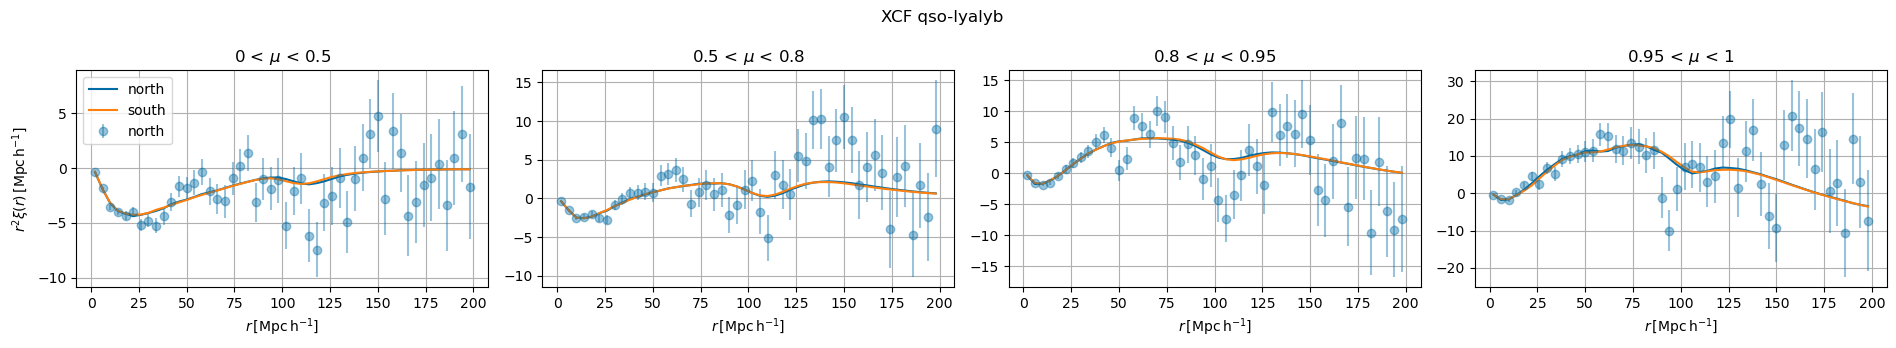

In [33]:
region = "lyb"

fig, axs = plt.subplots(
    1,
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5),
)


mus = [0, 0.5, 0.8, 0.95, 1]


for mumin, mumax, ax in zip(mus[:-1], mus[1:], axs):
    CorrelationPlots.xcf(
        reference,
        region=region,
        r_factor=2,
        ax=ax,
        mumin=mumin,
        mumax=mumax,
        plot_kwargs=dict(fmt="o", label=reference.label, c=reference.colour, alpha=0.4),
    )
    for i, bkp in enumerate(analyses):
        FitPlots.xcf_model(
            bkp,
            region=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(label=bkp.label, c=bkp.colour),
        )


for ax in axs[1:]:
    ax.set_ylabel(None)

for ax in axs.reshape(-1):
    ax.grid(visible=True)

axs[0].legend()

plt.suptitle(f"XCF qso-lya{region}")
plt.tight_layout()

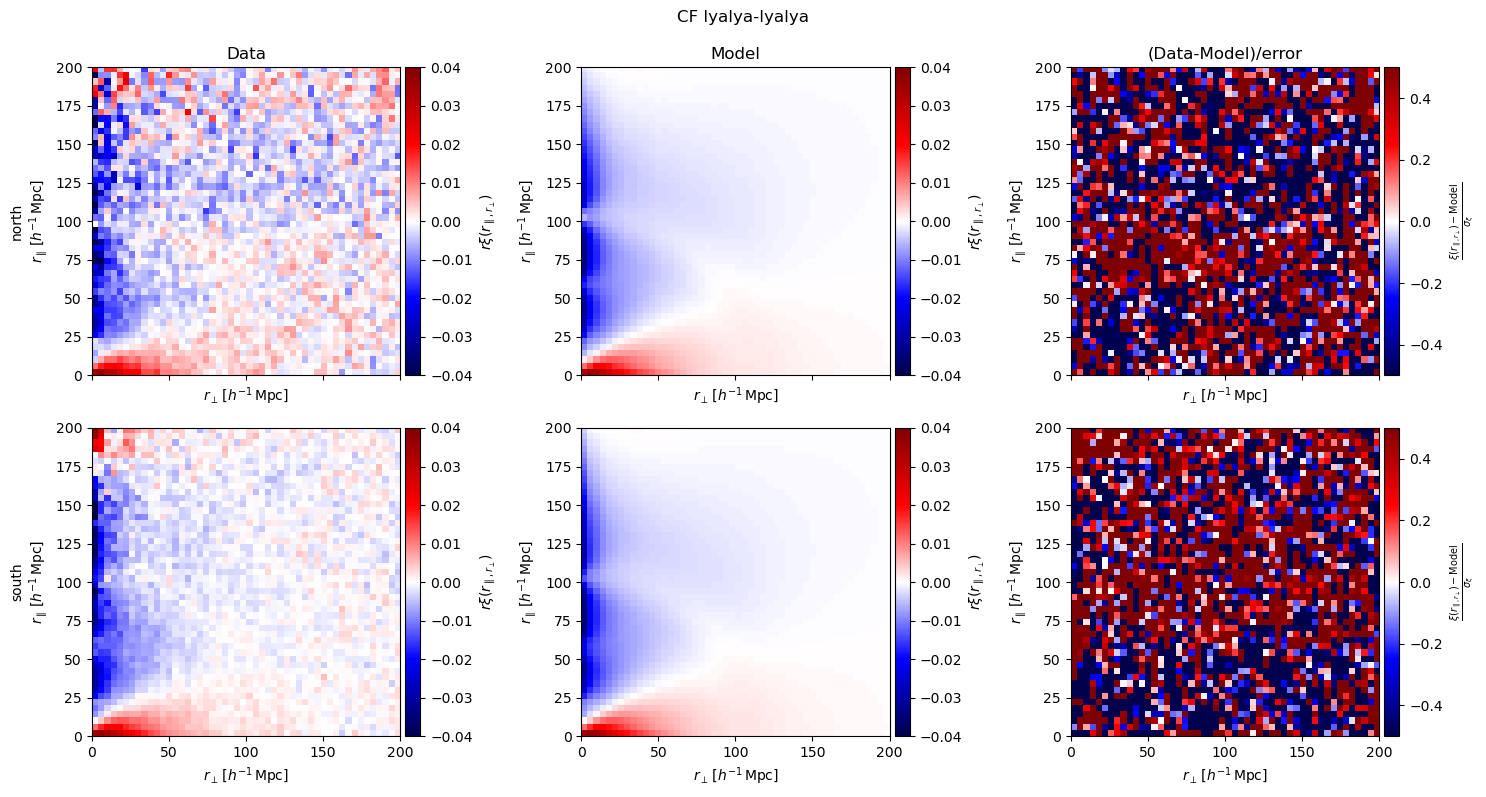

In [135]:
region = "lya"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col",
    figsize=(15, len(analyses) * 4),
)

for bkp in analyses:
    bkp.data = CorrelationPlots.cf_map(
        bkp, region="lya", region2=region, r_factor=1, just_return_values=True
    )

    bkp.model = FitPlots.cf_model_map(
        bkp, region="lya", region2=region, r_factor=1, just_return_values=True
    )

axs[0][0].set_title("Data")
axs[0][1].set_title("Model")
axs[0][2].set_title("(Data-Model)/error")

for ax_row, bkp in zip(axs, analyses):
    ax = ax_row[0]
    im = ax.imshow(
        bkp.data[1],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.04,
        vmax=0.04,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(bkp.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[1]
    im = ax.imshow(
        bkp.model[1],
        origin="lower",
        extent=bkp.model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.04,
        vmax=0.04,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[2]
    im = ax.imshow(
        (bkp.data[1] - bkp.model[1]) / bkp.data[2],
        origin="lower",
        extent=bkp.model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.5,
        vmax=0.5,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{\xi(r_{\parallel,r_{\perp}})-{\rm Model}}{\sigma_{\xi}}$")


plt.suptitle(f"CF lyalya-lya{region}", y=0.99)
plt.tight_layout()

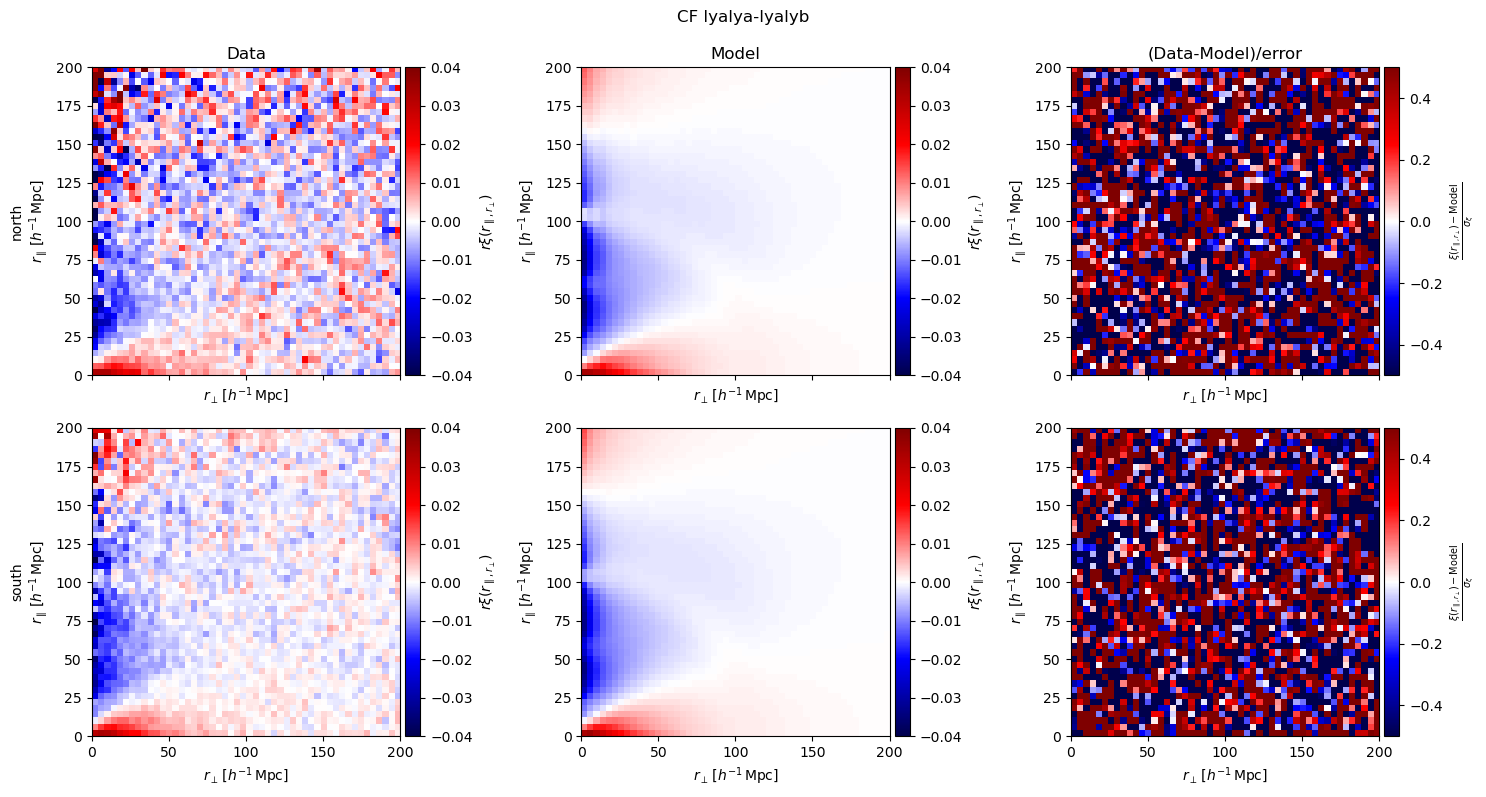

In [136]:
region = "lyb"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col",
    figsize=(15, len(analyses) * 4),
)

for bkp in analyses:
    bkp.data = CorrelationPlots.cf_map(
        bkp, region="lya", region2=region, r_factor=1, just_return_values=True
    )

    bkp.model = FitPlots.cf_model_map(
        bkp, region="lya", region2=region, r_factor=1, just_return_values=True
    )

axs[0][0].set_title("Data")
axs[0][1].set_title("Model")
axs[0][2].set_title("(Data-Model)/error")

for ax_row, bkp in zip(axs, analyses):
    ax = ax_row[0]
    im = ax.imshow(
        bkp.data[1],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.04,
        vmax=0.04,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(bkp.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[1]
    im = ax.imshow(
        bkp.model[1],
        origin="lower",
        extent=bkp.model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.04,
        vmax=0.04,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[2]
    im = ax.imshow(
        (bkp.data[1] - bkp.model[1]) / bkp.data[2],
        origin="lower",
        extent=bkp.model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.5,
        vmax=0.5,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{\xi(r_{\parallel,r_{\perp}})-{\rm Model}}{\sigma_{\xi}}$")


plt.suptitle(f"CF lyalya-lya{region}", y=0.99)
plt.tight_layout()

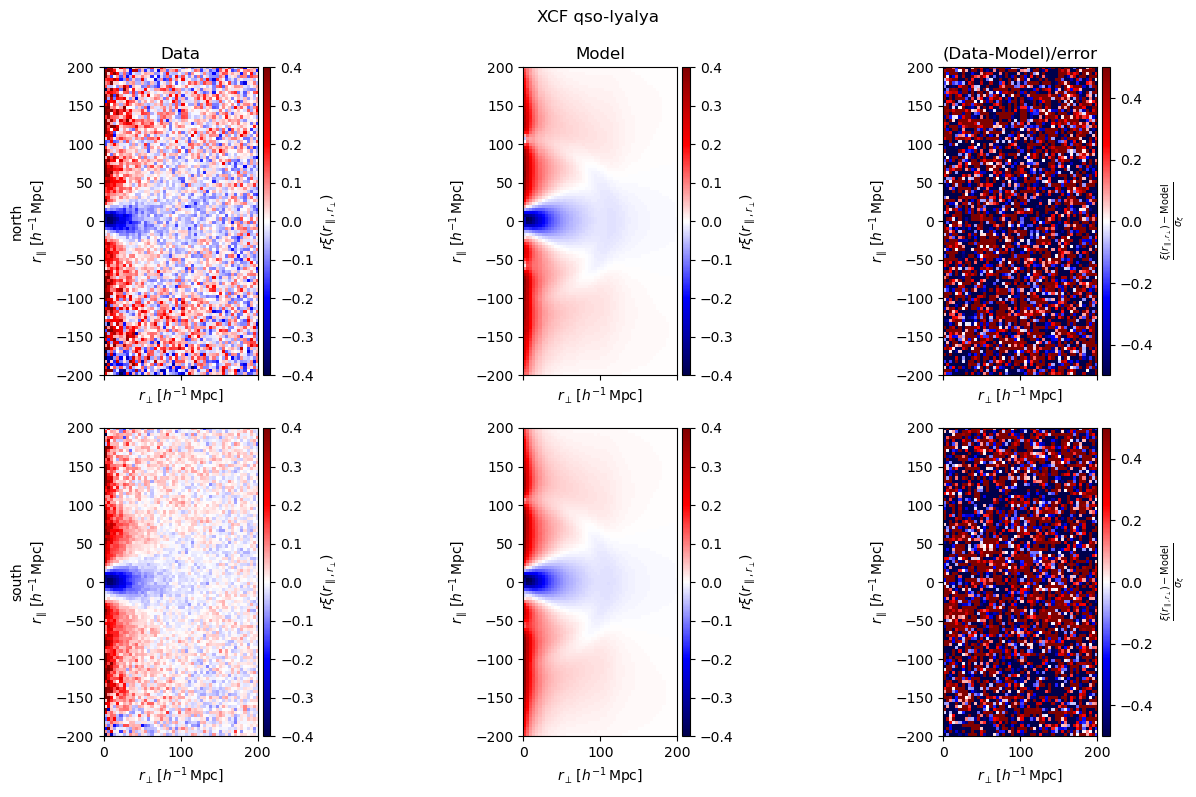

In [132]:
region = "lya"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col",
    figsize=(13, len(analyses) * 4),
)


for bkp in analyses:
    bkp.data = CorrelationPlots.xcf_map(
        bkp, region=region, r_factor=1, just_return_values=True
    )

    bkp.model = FitPlots.xcf_model_map(
        bkp, region=region, r_factor=1, just_return_values=True
    )

axs[0][0].set_title("Data")
axs[0][1].set_title("Model")
axs[0][2].set_title("(Data-Model)/error")


for ax_row, bkp in zip(axs, analyses):
    ax = ax_row[0]
    im = ax.imshow(
        bkp.data[1],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(bkp.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[1]
    im = ax.imshow(
        bkp.model[1],
        origin="lower",
        extent=bkp.model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[2]
    im = ax.imshow(
        (bkp.data[1] - bkp.model[1]) / bkp.data[2],
        origin="lower",
        extent=bkp.model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.5,
        vmax=0.5,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{\xi(r_{\parallel,r_{\perp}})-{\rm Model}}{\sigma_{\xi}}$")


plt.suptitle(f"XCF qso-lya{region}", y=0.99)
plt.tight_layout()

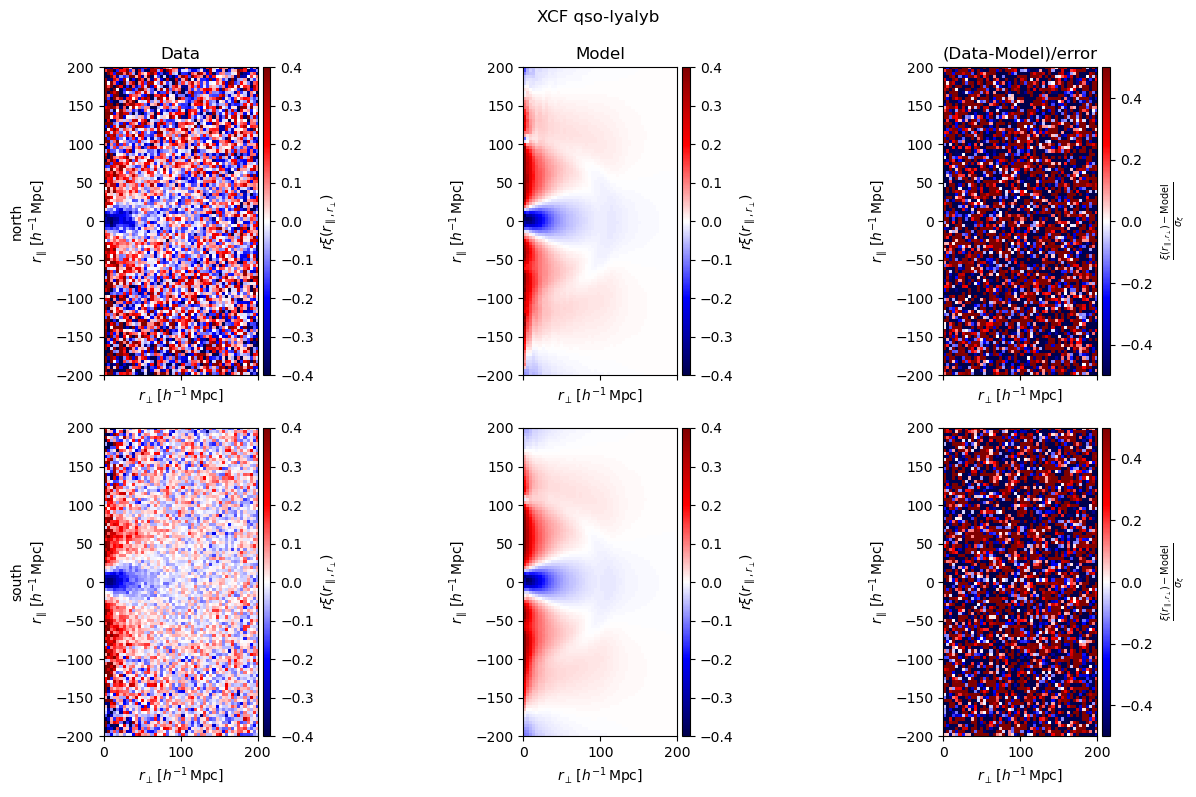

In [133]:
region = "lyb"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col",
    figsize=(13, len(analyses) * 4),
)


for bkp in analyses:
    bkp.data = CorrelationPlots.xcf_map(
        bkp, region=region, r_factor=1, just_return_values=True
    )

    bkp.model = FitPlots.xcf_model_map(
        bkp, region=region, r_factor=1, just_return_values=True
    )

axs[0][0].set_title("Data")
axs[0][1].set_title("Model")
axs[0][2].set_title("(Data-Model)/error")


for ax_row, bkp in zip(axs, analyses):
    ax = ax_row[0]
    im = ax.imshow(
        bkp.data[1],
        origin="lower",
        extent=bkp.data[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(bkp.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[1]
    im = ax.imshow(
        bkp.model[1],
        origin="lower",
        extent=bkp.model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[2]
    im = ax.imshow(
        (bkp.data[1] - bkp.model[1]) / bkp.data[2],
        origin="lower",
        extent=bkp.model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.5,
        vmax=0.5,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{\xi(r_{\parallel,r_{\perp}})-{\rm Model}}{\sigma_{\xi}}$")


plt.suptitle(f"XCF qso-lya{region}", y=0.99)
plt.tight_layout()

In [18]:
fit_data = []
for bkp in analyses:
    bkp.fit = ReadFits(
        bkp,
        label=bkp.label,
        colour=bkp.colour,
    )
    fit_data.append(bkp.fit)

params = ["ap", "at", "bias_LYA", "beta_LYA", "bias_QSO"]

NameError: name 'fit_data' is not defined

In [19]:
ReadFits.table_from_fit_data(
    fit_data,
    params=params,
    params_names=params,
)

NameError: name 'ReadFits' is not defined

NameError: name 'FitPlots' is not defined

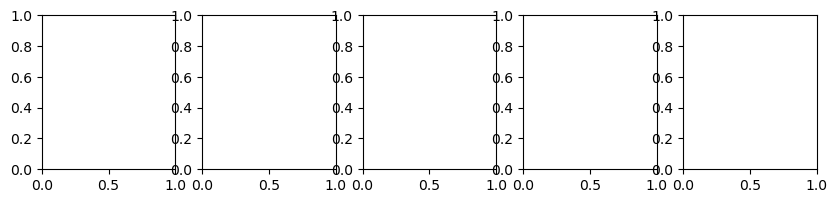

In [20]:
fig, axs = plt.subplots(1, len(params) + 1, figsize=(10, 2))

fit_data = [bkp.fit for bkp in analyses if bkp != reference]

for ax, param in zip(axs[:-1], params):
    hs = FitPlots.plot_errorbars_from_fit(fit_data, param, ax=ax, reference=reference.fit)

_ = FitPlots.plot_p_value_from_fit(fit_data, ax=axs[-1], reference=reference.fit)

plt.legend(handles=hs, loc="center left", bbox_to_anchor=(1, 0.5), reverse=True)

plt.tight_layout()